# Synthetic CPS


Use the [CPS data.](https://github.com/open-source-economics/taxdata/blob/master/cps_data/cps.csv.gz)

## Setup

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Graph options

In [2]:
!wget https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
mpl.font_manager._rebuild()

--2018-11-15 22:36:48--  https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf
Resolving github.com (github.com)... 192.30.255.113, 192.30.255.112
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MaxGhenis/random/master/Roboto-Regular.ttf [following]
--2018-11-15 22:36:49--  https://raw.githubusercontent.com/MaxGhenis/random/master/Roboto-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.40.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.40.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145348 (142K) [application/octet-stream]
/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf: No such file or directory/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/Roboto-Regular.ttf: No such file or directory

Cannot write to '/usr/local

In [3]:
sns.set_style('white')
DPI = 200
mpl.rc('savefig', dpi=DPI)
mpl.rcParams['figure.dpi'] = DPI
mpl.rcParams['figure.figsize'] = 6.4, 4.8  # Default.
mpl.rcParams['font.sans-serif'] = 'Roboto'
mpl.rcParams['font.family'] = 'sans-serif'

# Set title text color to dark gray (https://material.io/color) not black.
TITLE_COLOR = '#212121'
mpl.rcParams['text.color'] = TITLE_COLOR

# Axis titles and tick marks are medium gray.
AXIS_COLOR = '#757575'
mpl.rcParams['axes.labelcolor'] = AXIS_COLOR
mpl.rcParams['xtick.color'] = AXIS_COLOR
mpl.rcParams['ytick.color'] = AXIS_COLOR

### Data

#### Load

In [4]:
test = pd.read_csv('test.csv')
rf = pd.read_csv('synth.csv').round()  # Not all integer.
synthpop = pd.read_csv('synth_synthpop.csv')

## Evaluate

Compare CDFs and correlations to test data.

In [5]:
def cdf(df, col):
  res = df[[col, 's006']].sort_values(col)
  res['s006_cumpct'] = res.s006.cumsum() / res.s006.sum()
  return res

In [6]:
from matplotlib.ticker import MaxNLocator

def compare_cdf(rf, synthpop, test, col, unit_prepend=''):
    rf_cdf = cdf(rf, col)
    synthpop_cdf = cdf(synthpop, col)
    test_cdf = cdf(test, col)
    ax = rf_cdf.plot(x=col, y='s006_cumpct')
    synthpop_cdf.plot(x=col, y='s006_cumpct', ax=ax, color='green')
    test_cdf.plot(x=col, y='s006_cumpct', ax=ax, color='#BDBDBD')
    ax.legend(['Sequential random forests', 'synthpop R package', 'Test'])
    ax.grid(color='#eeeeee')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    # Assume a dollar amount if exceeds 100. Use symlog and $ axis.
    if test[col].max() > 100:
        unit_prepend = '$'
        plt.xscale('symlog')
    ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(
        lambda x, _: unit_prepend + format(int(x), ',')))
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
        lambda y, _: '{:.0%}'.format(y)))
    ax.set(xlabel=col, ylabel='Share of tax units')
    plt.title('CDF of ' + col + ' for synthetic and test sets', loc='left')
    sns.despine(left=True, bottom=True)
    plt.show()

10 columns at a time to avoid buffer error.

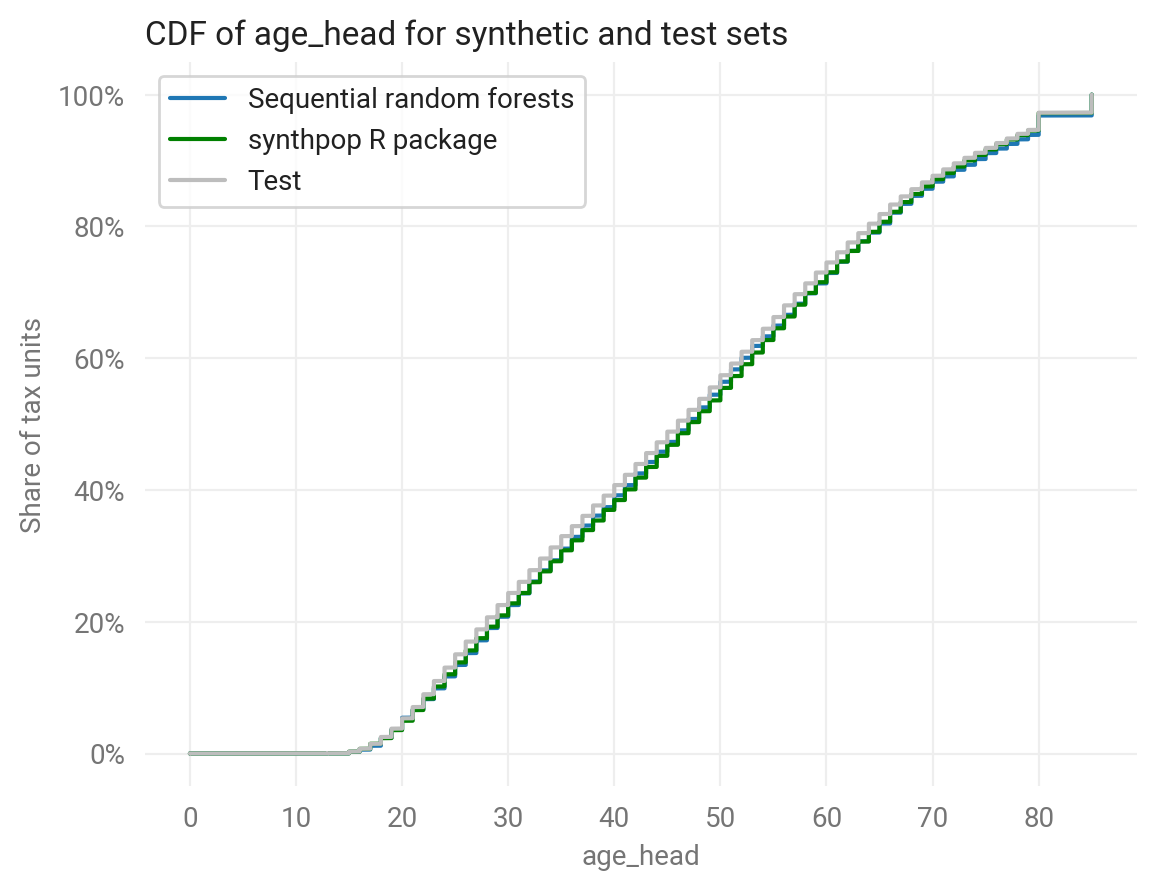

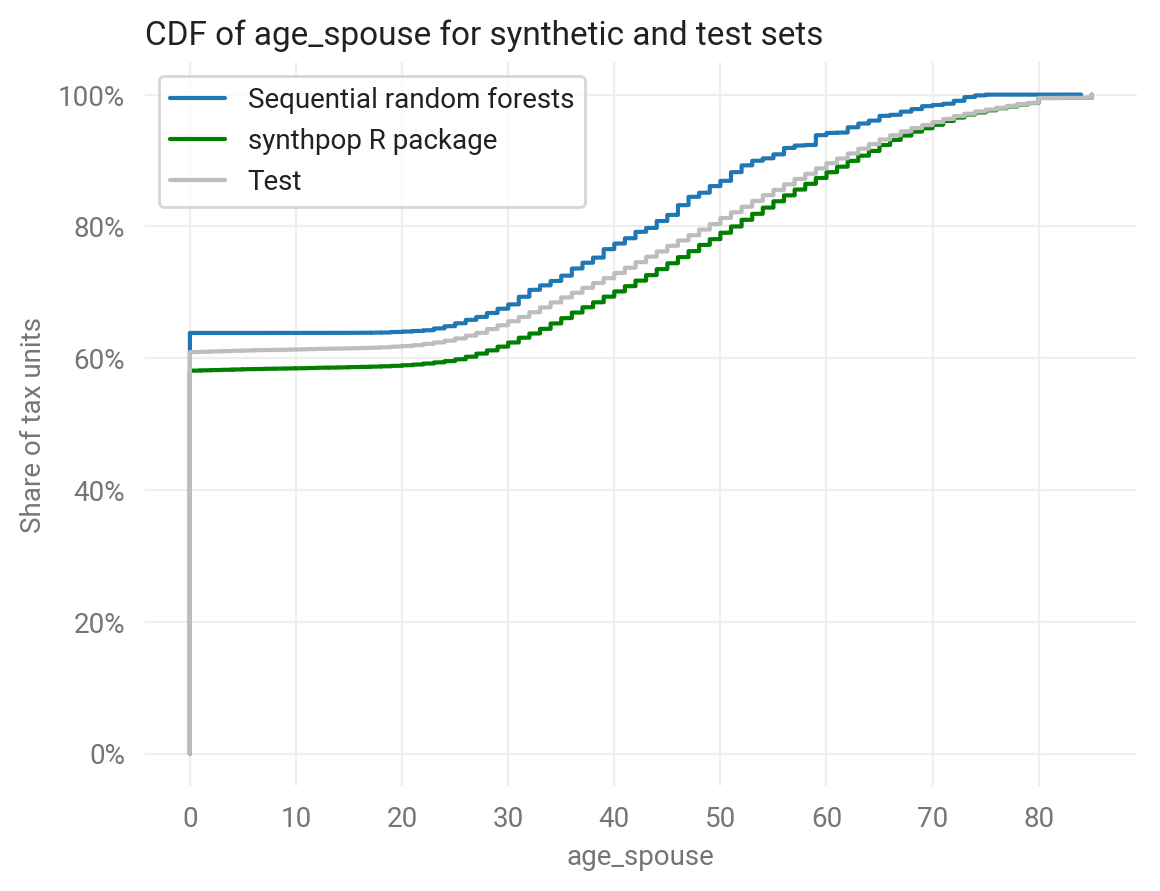

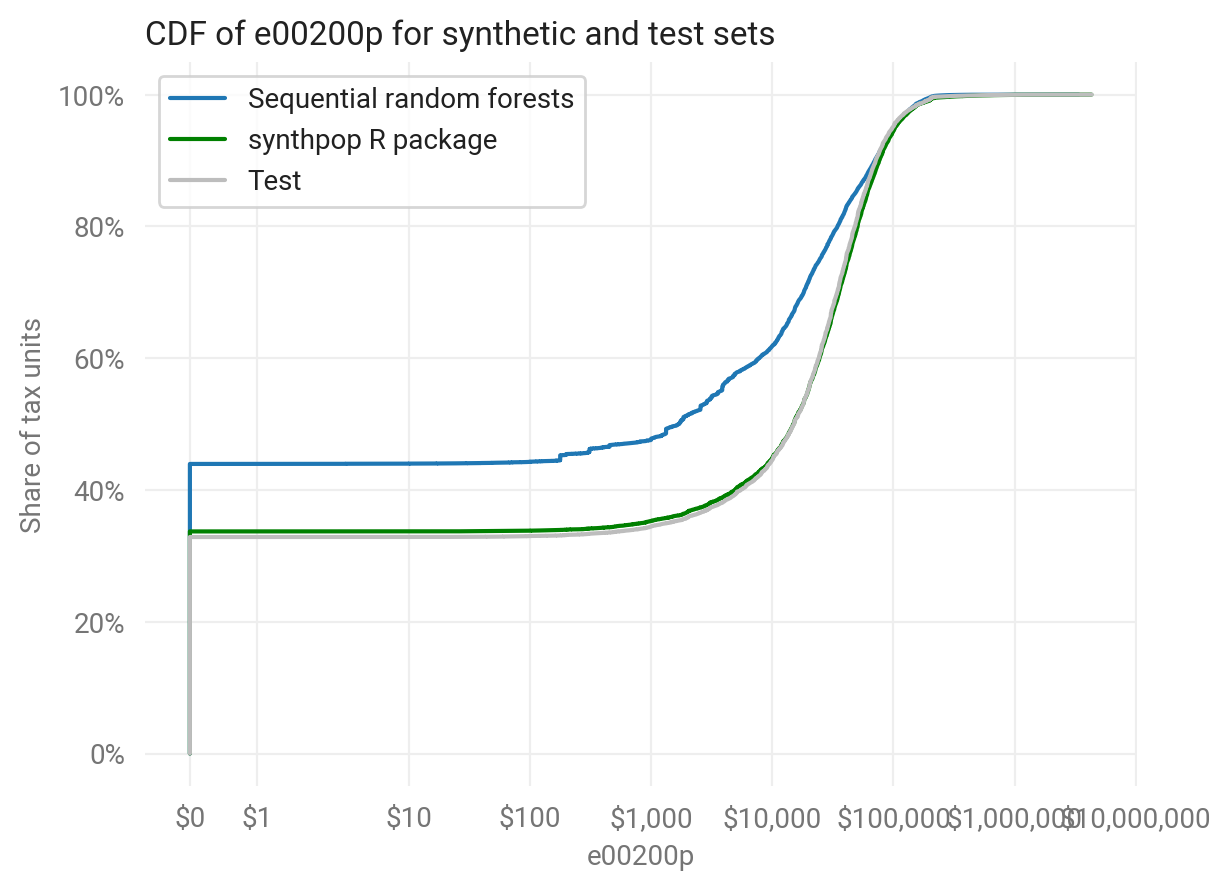

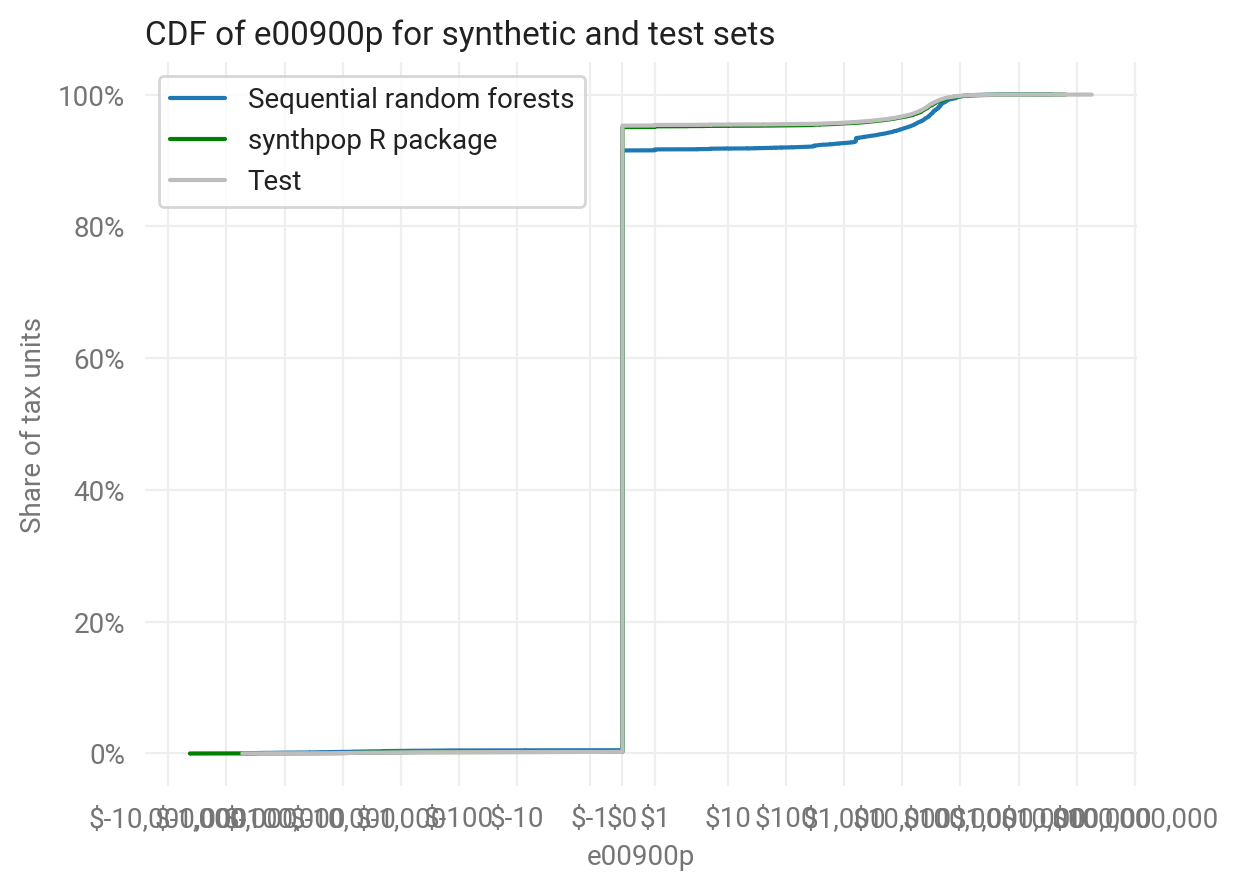

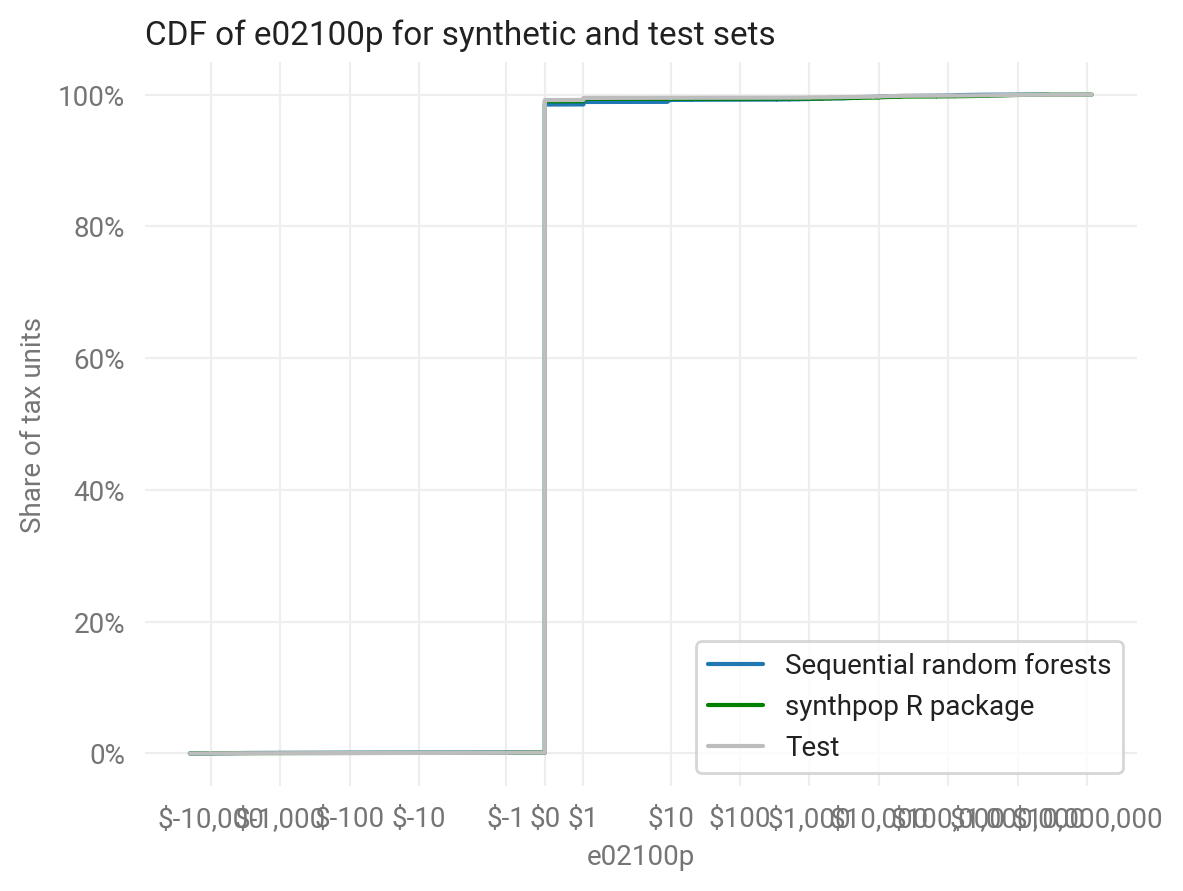

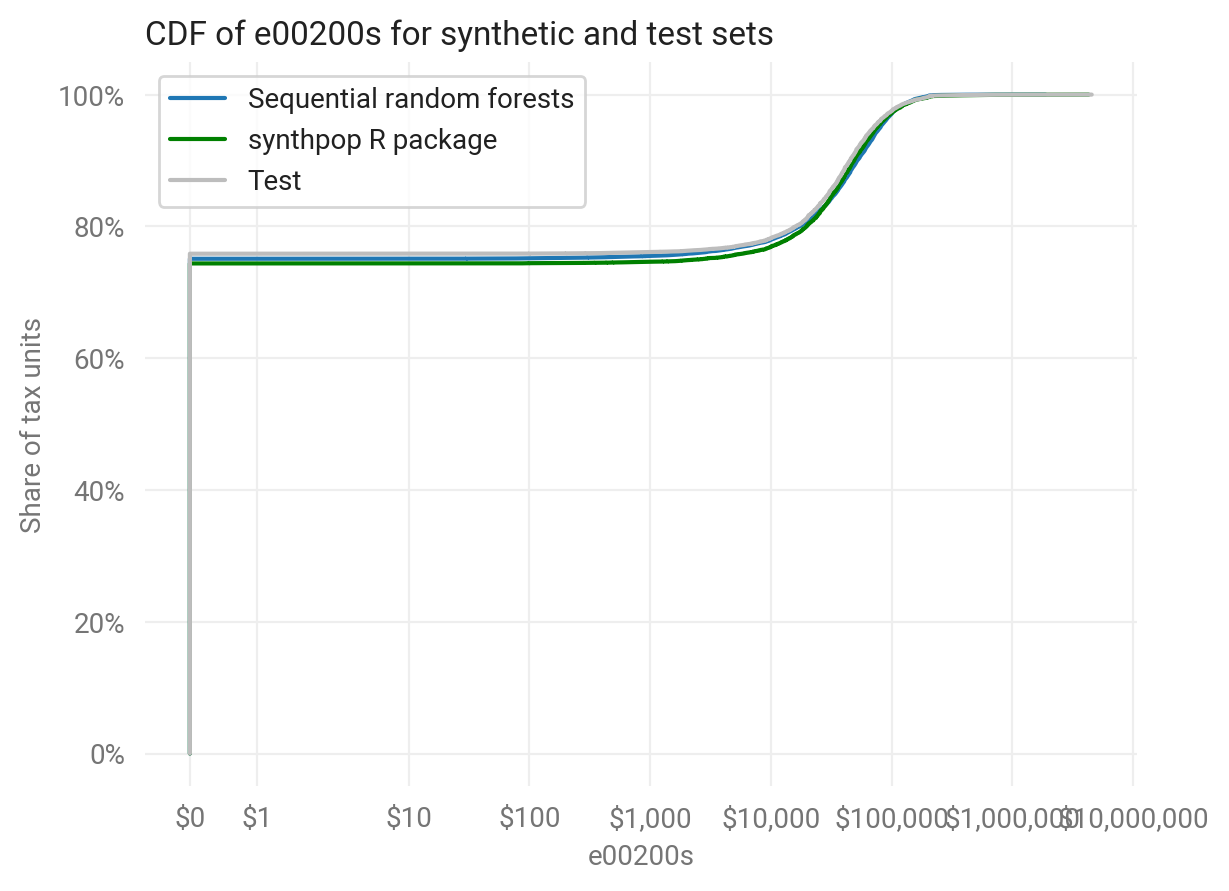

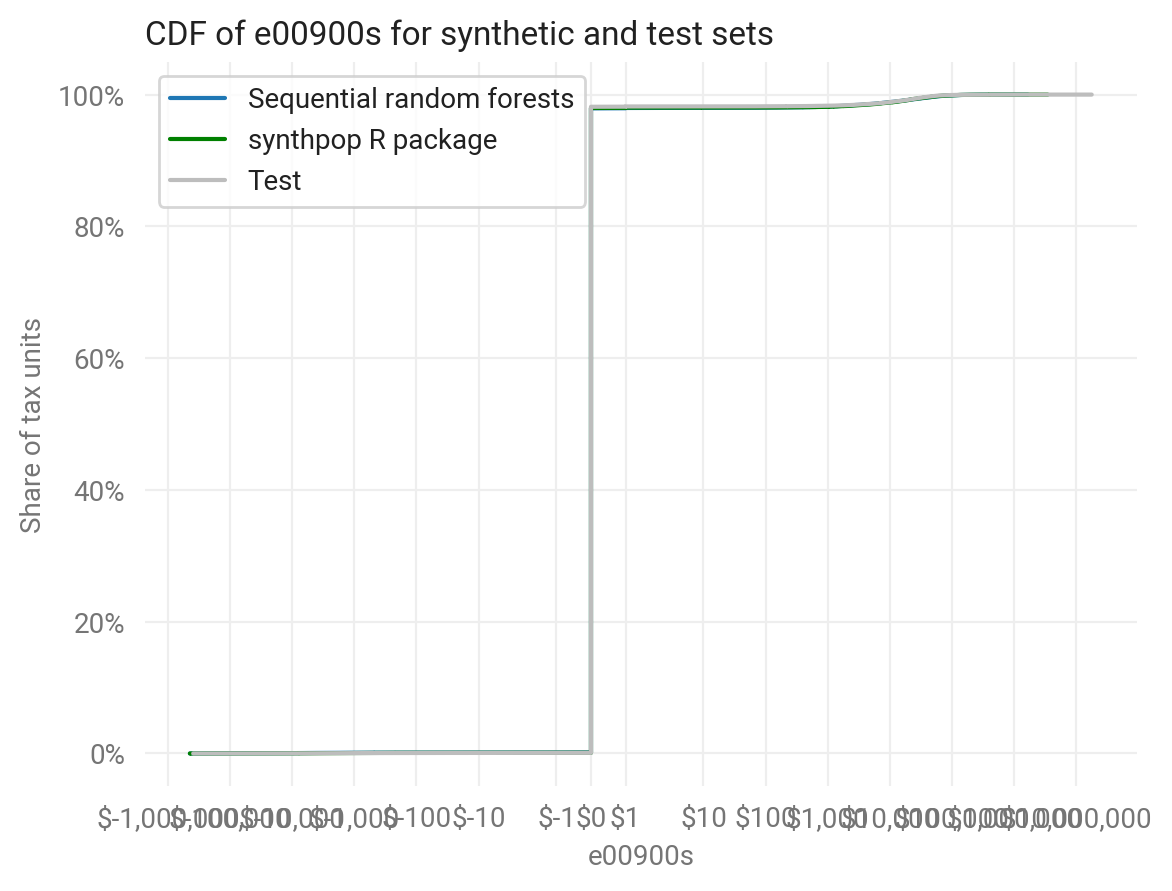

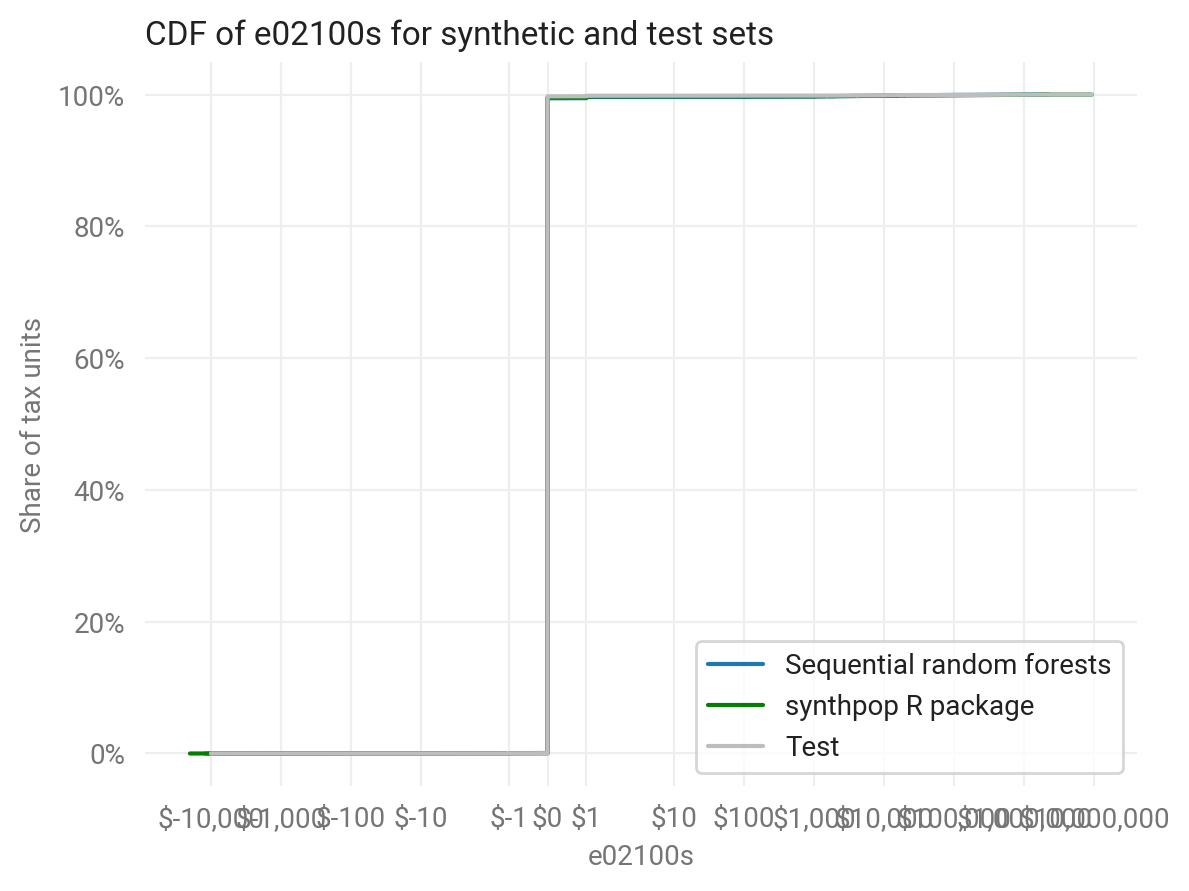

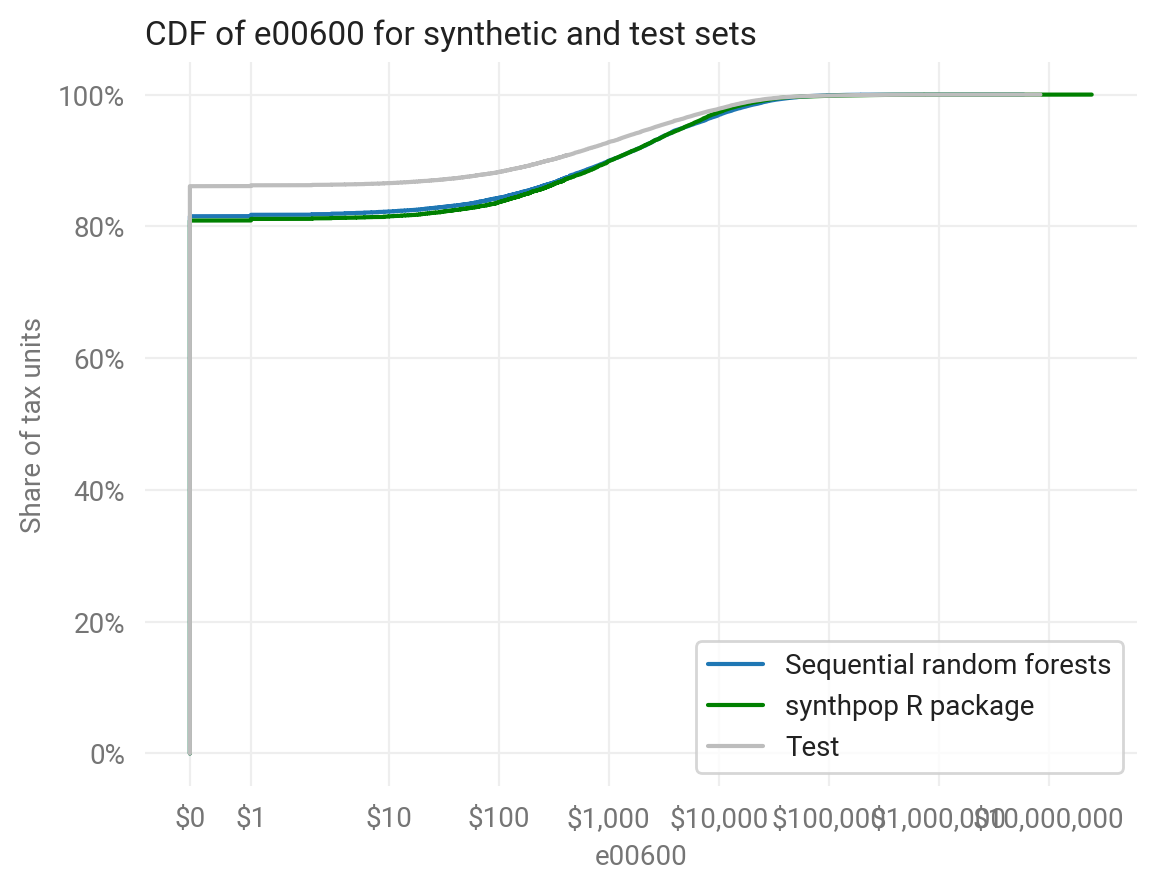

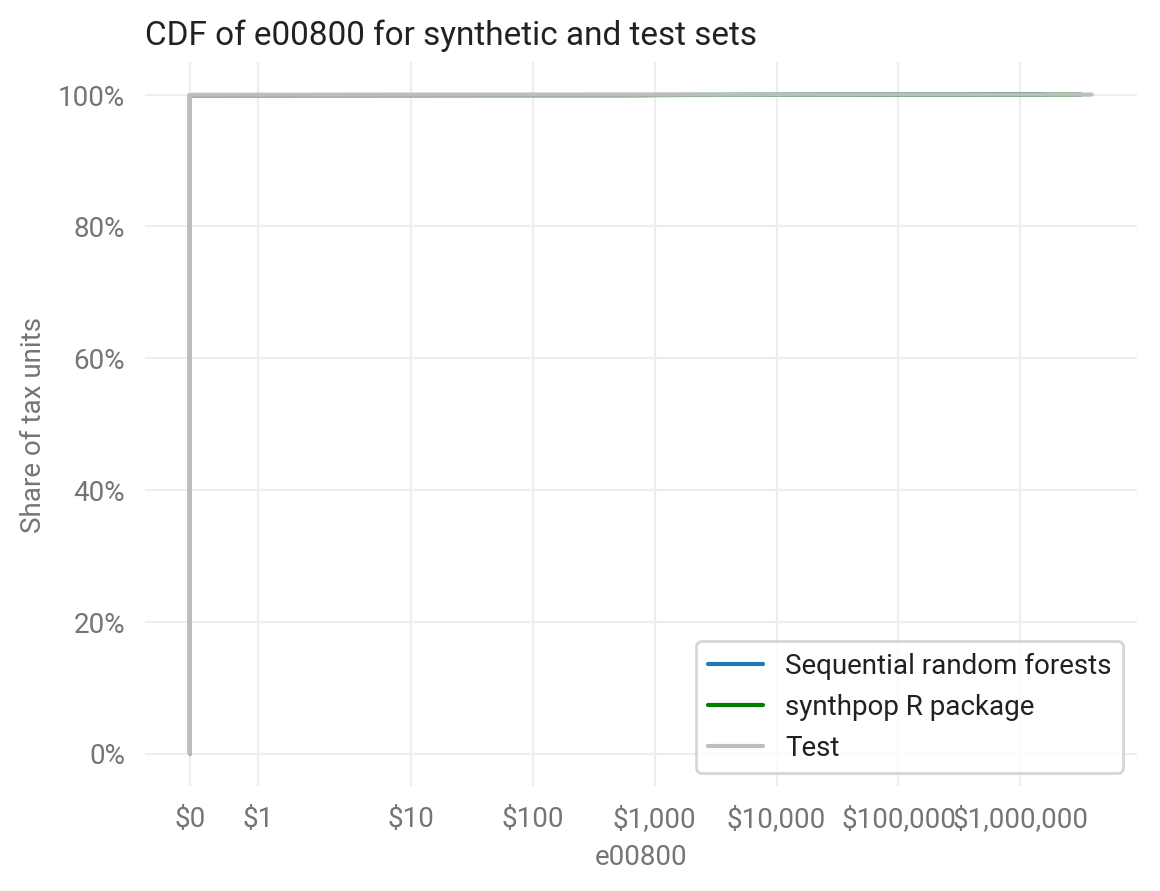

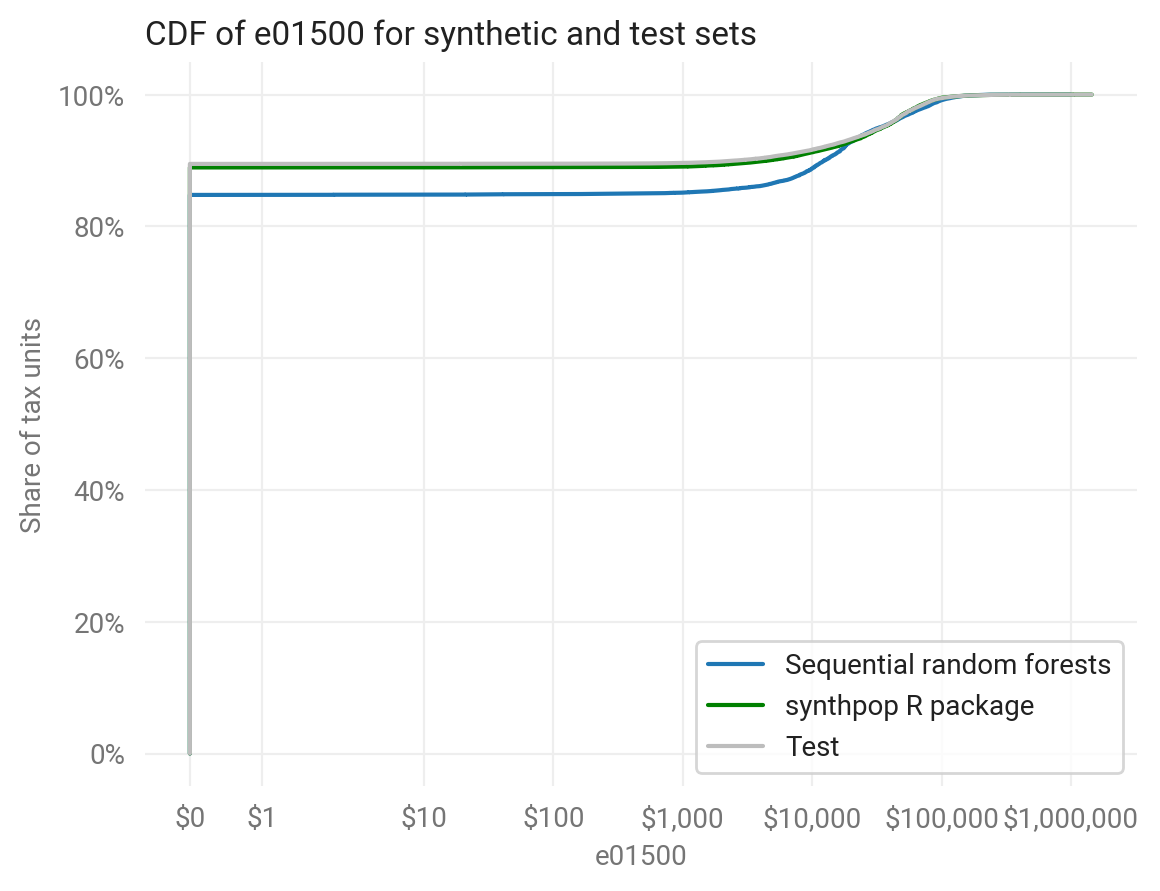

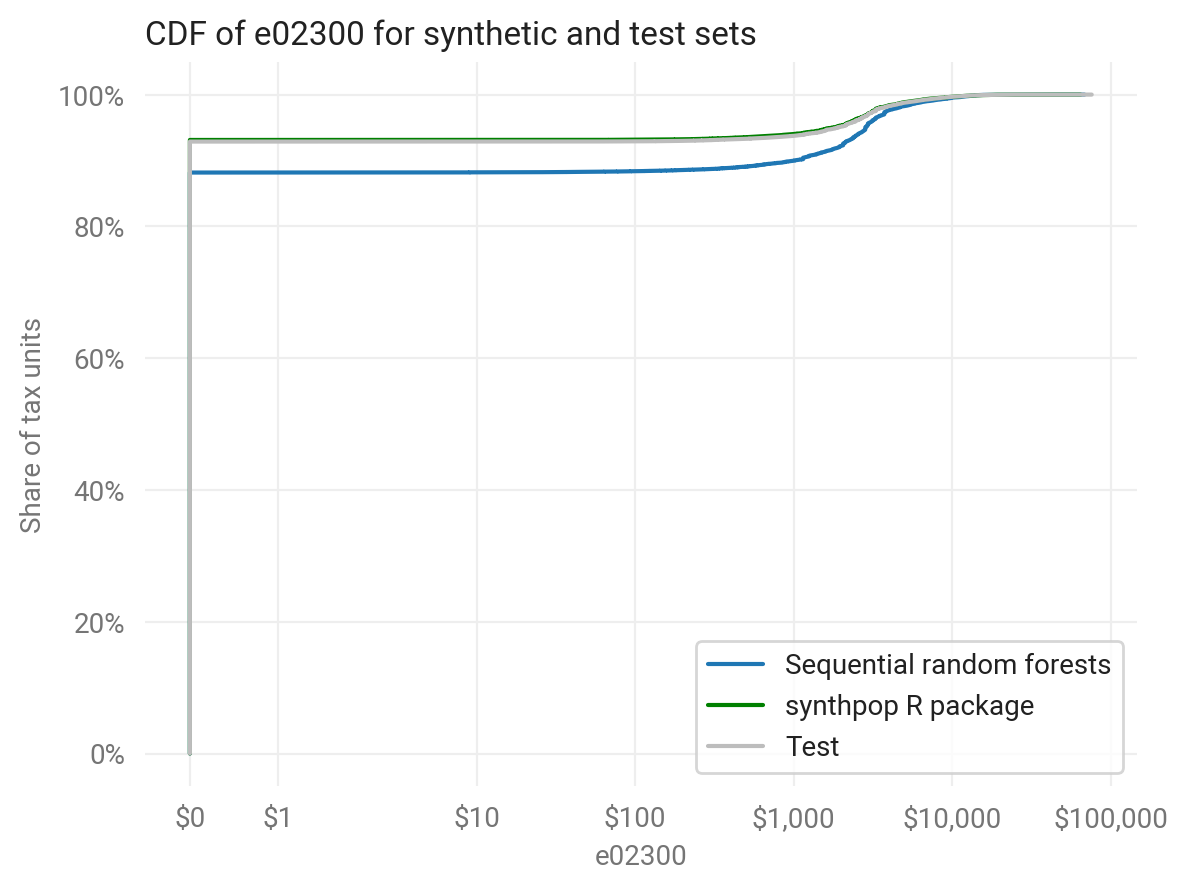

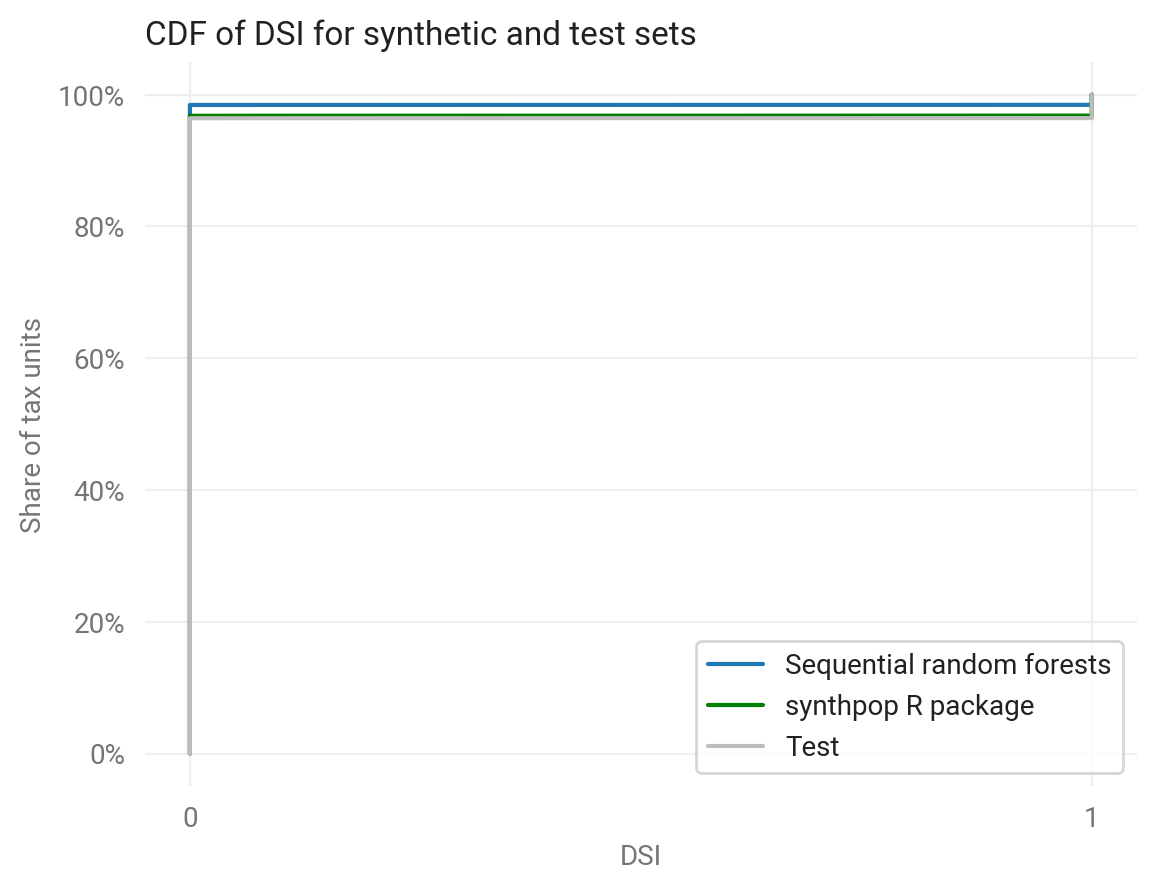

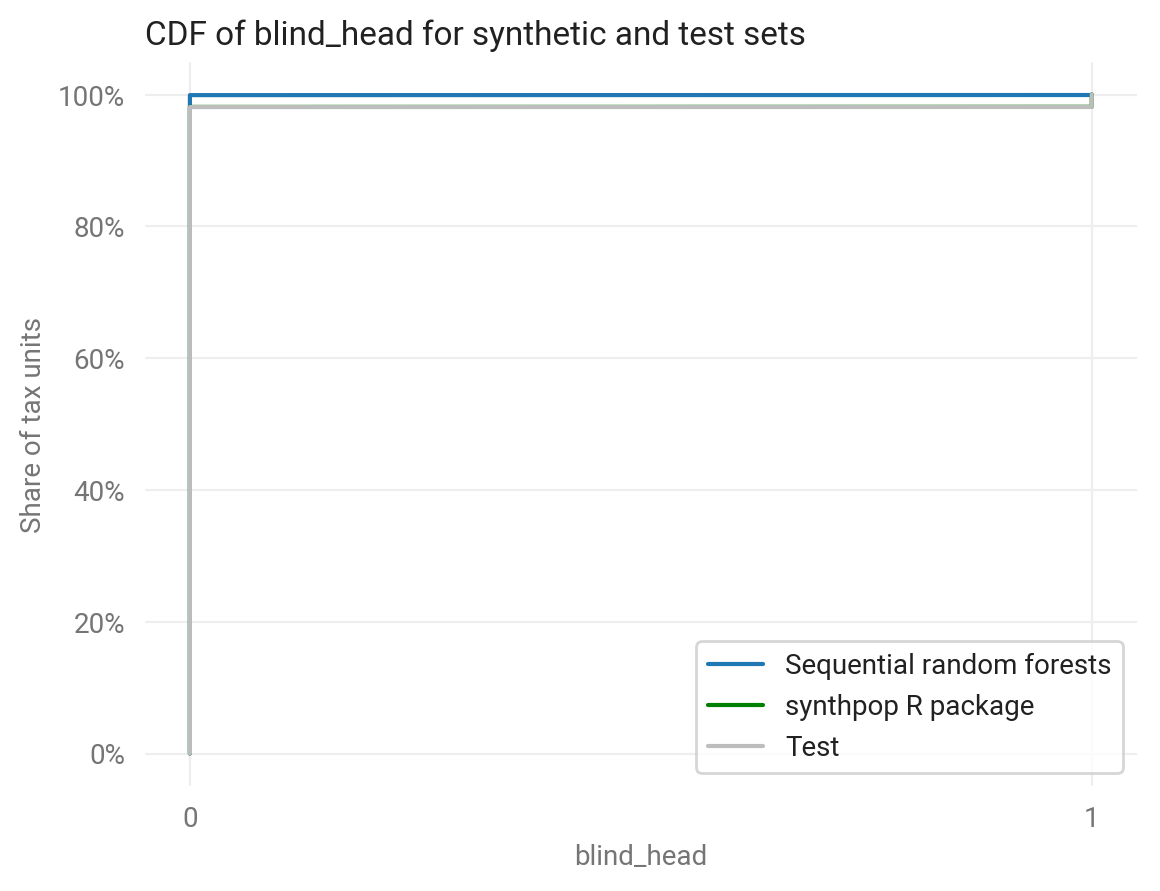

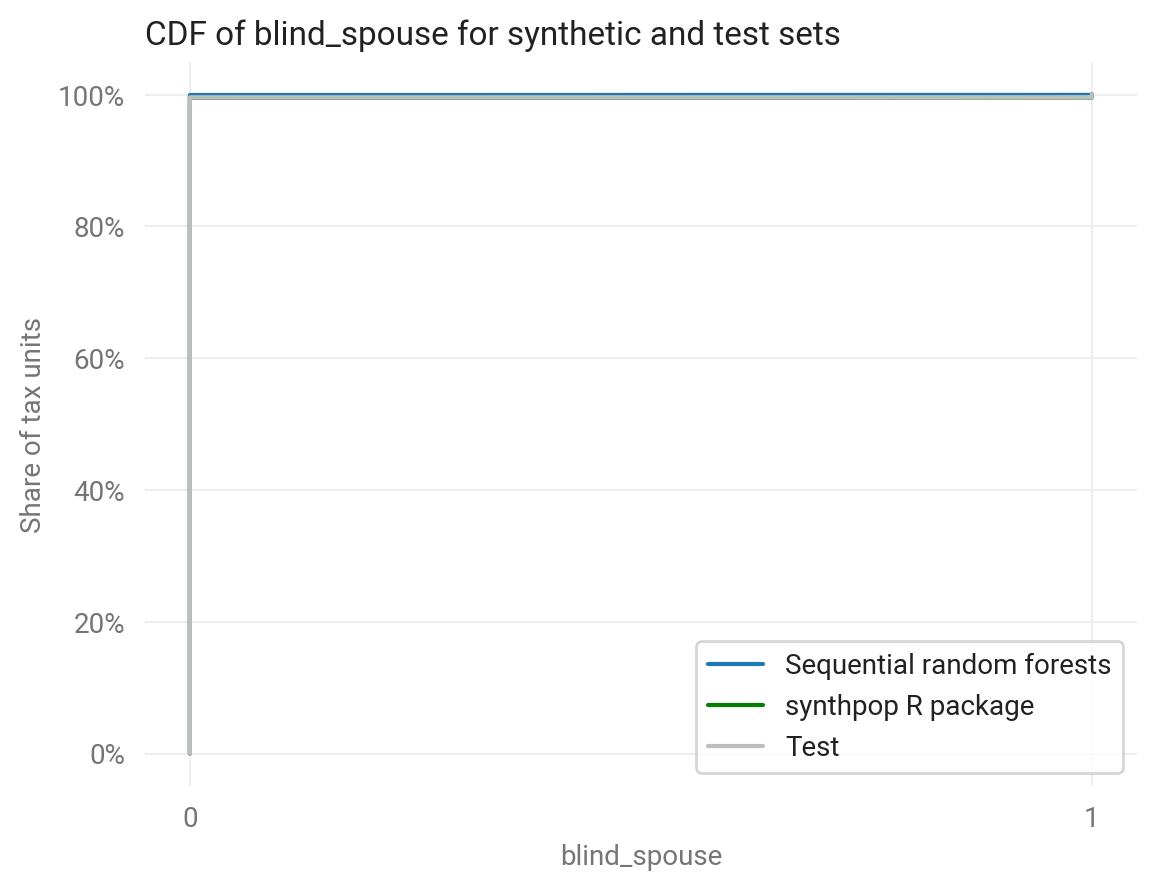

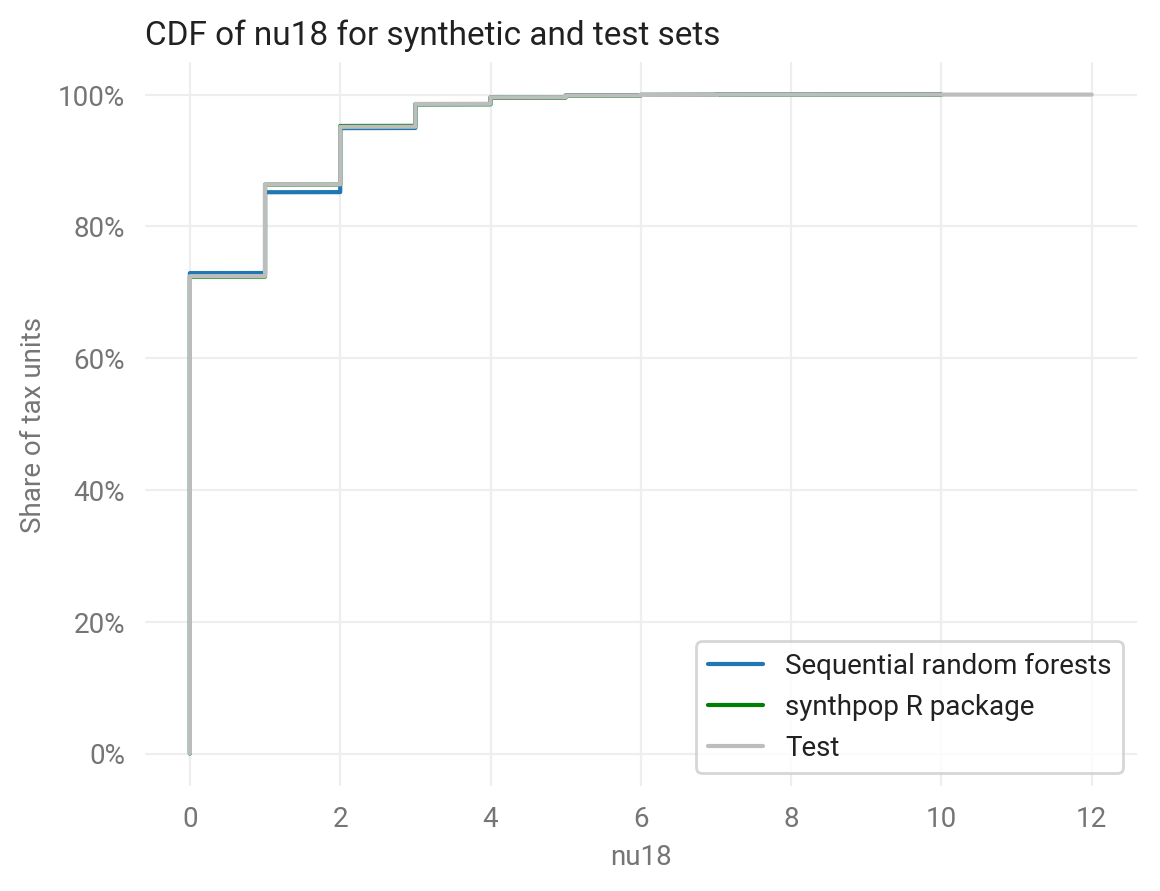

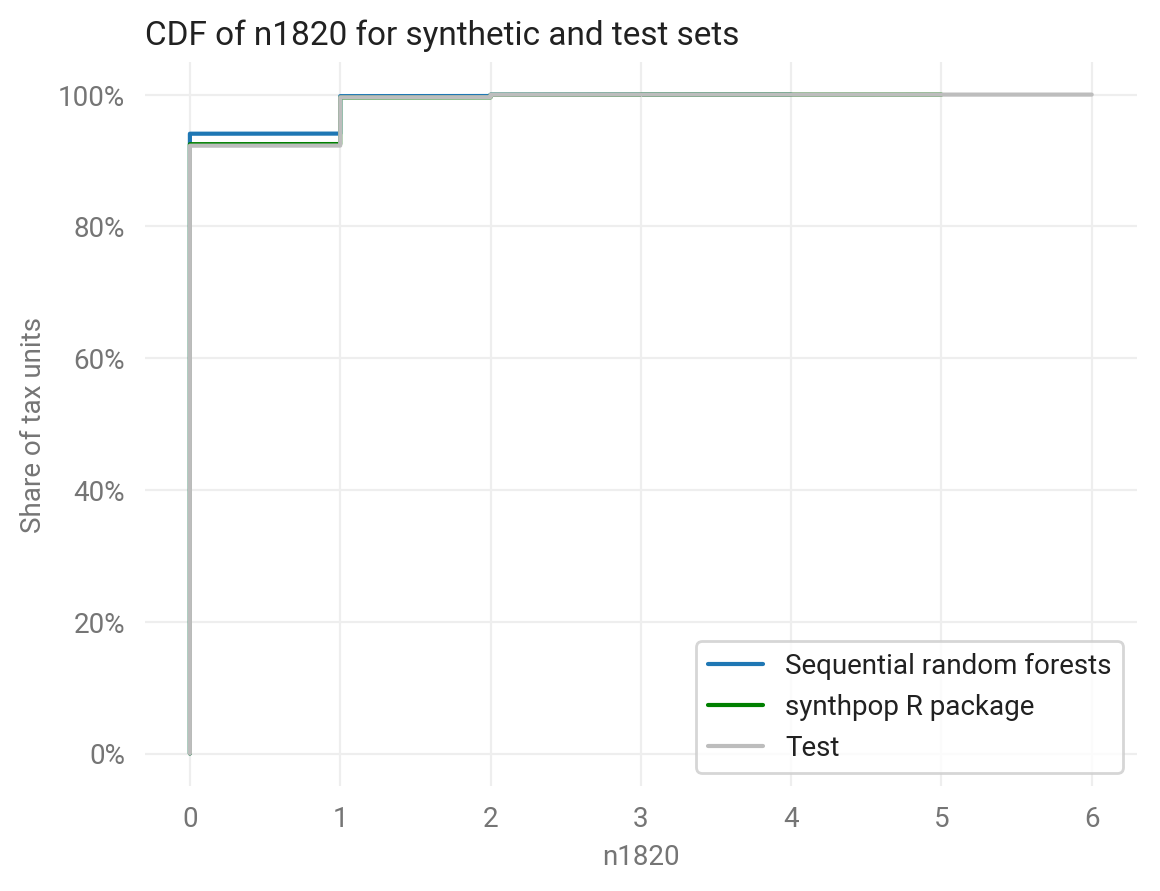

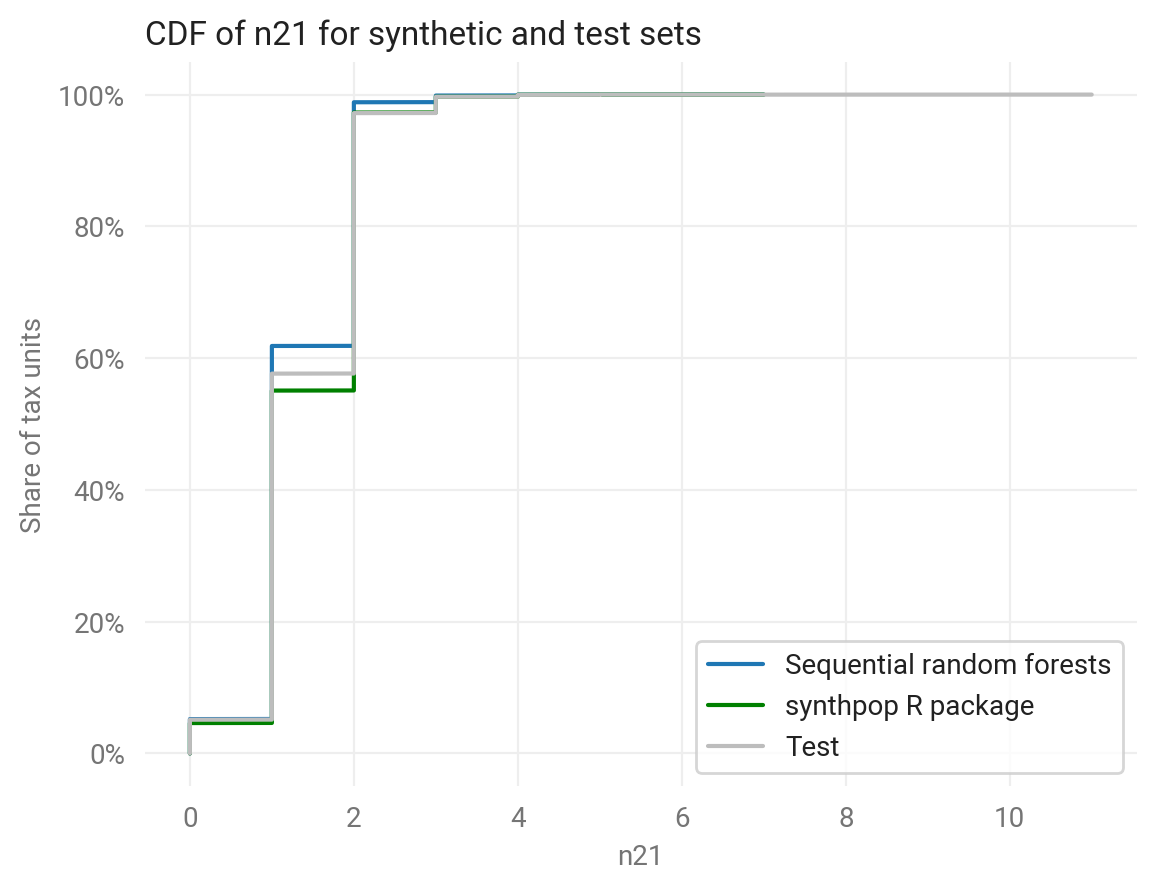

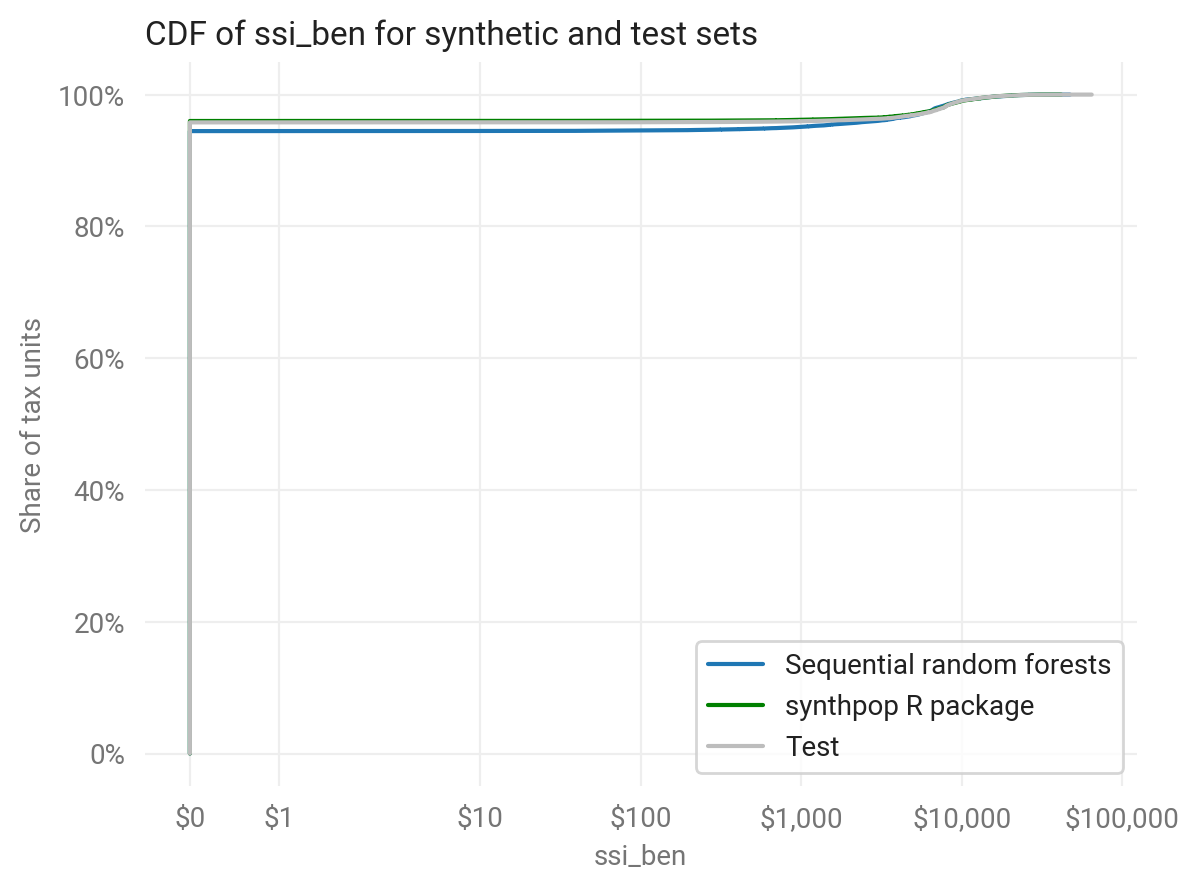

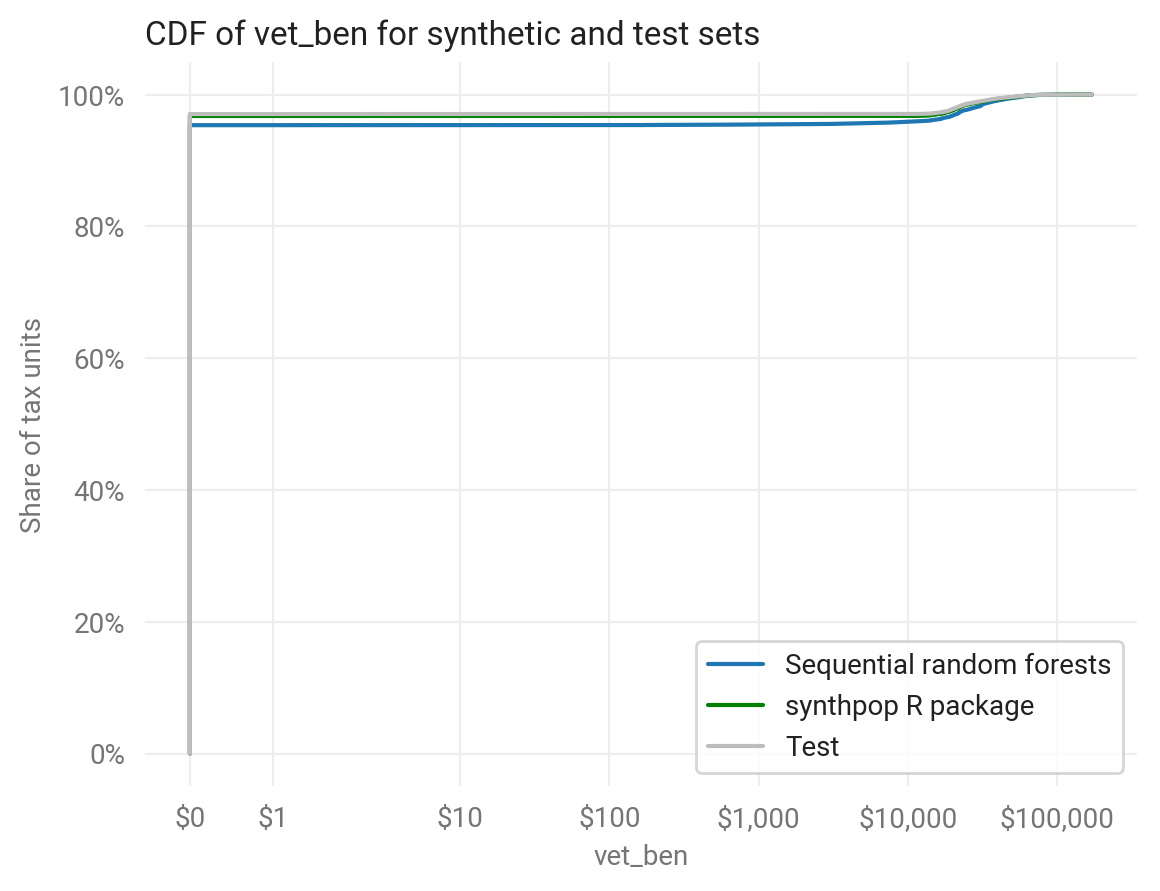

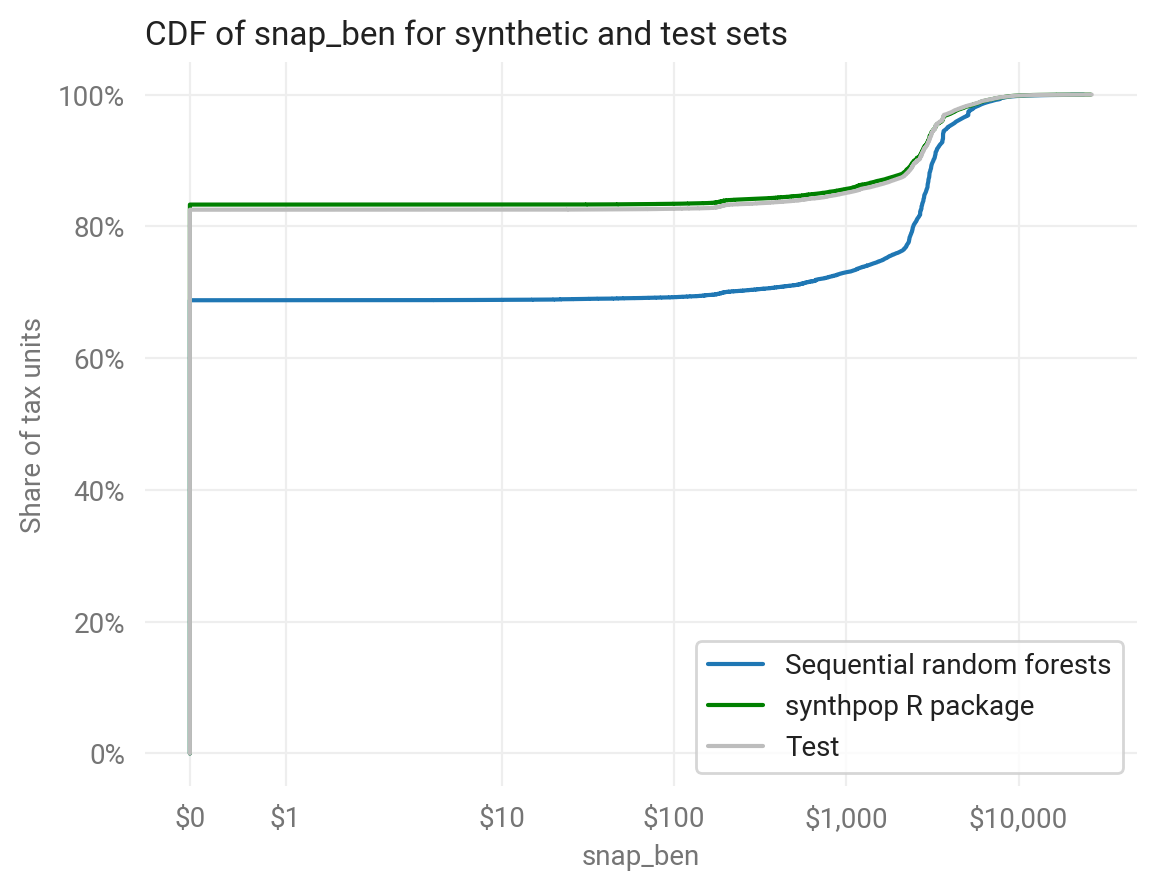

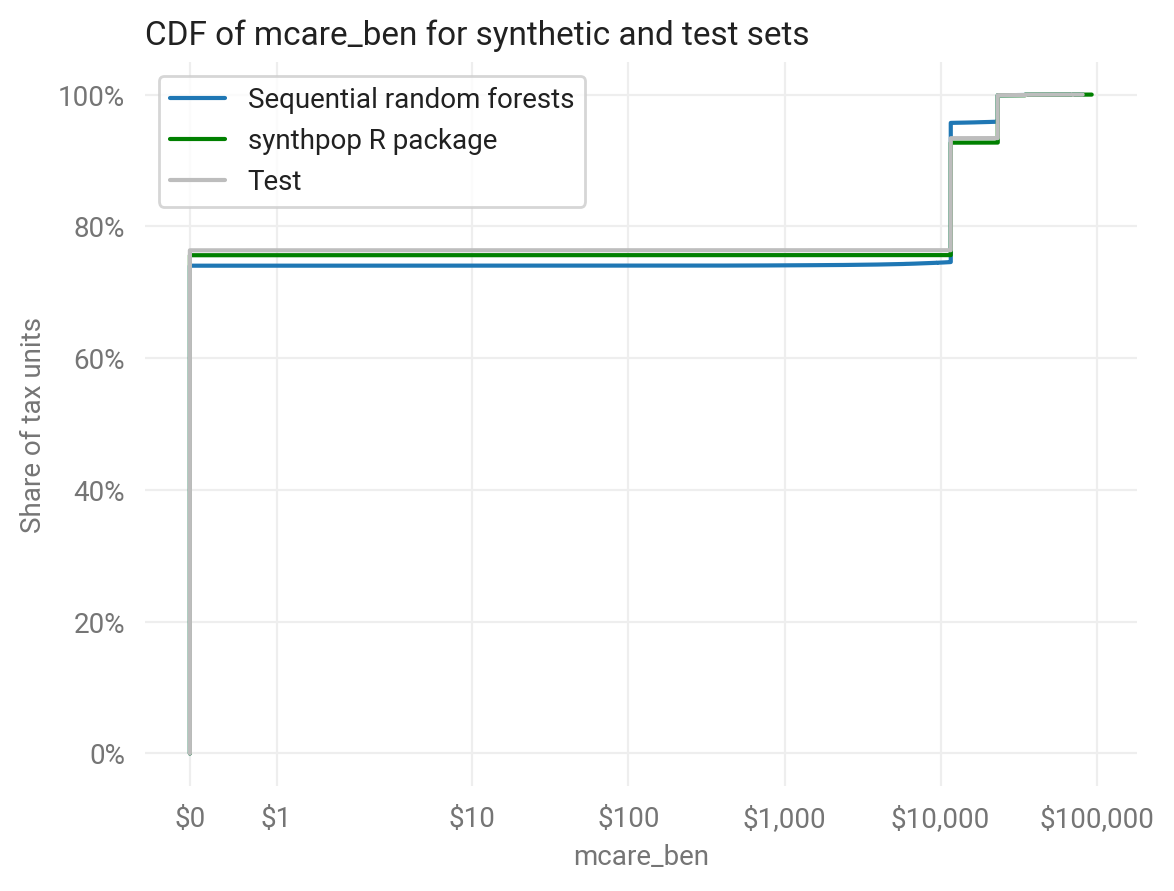

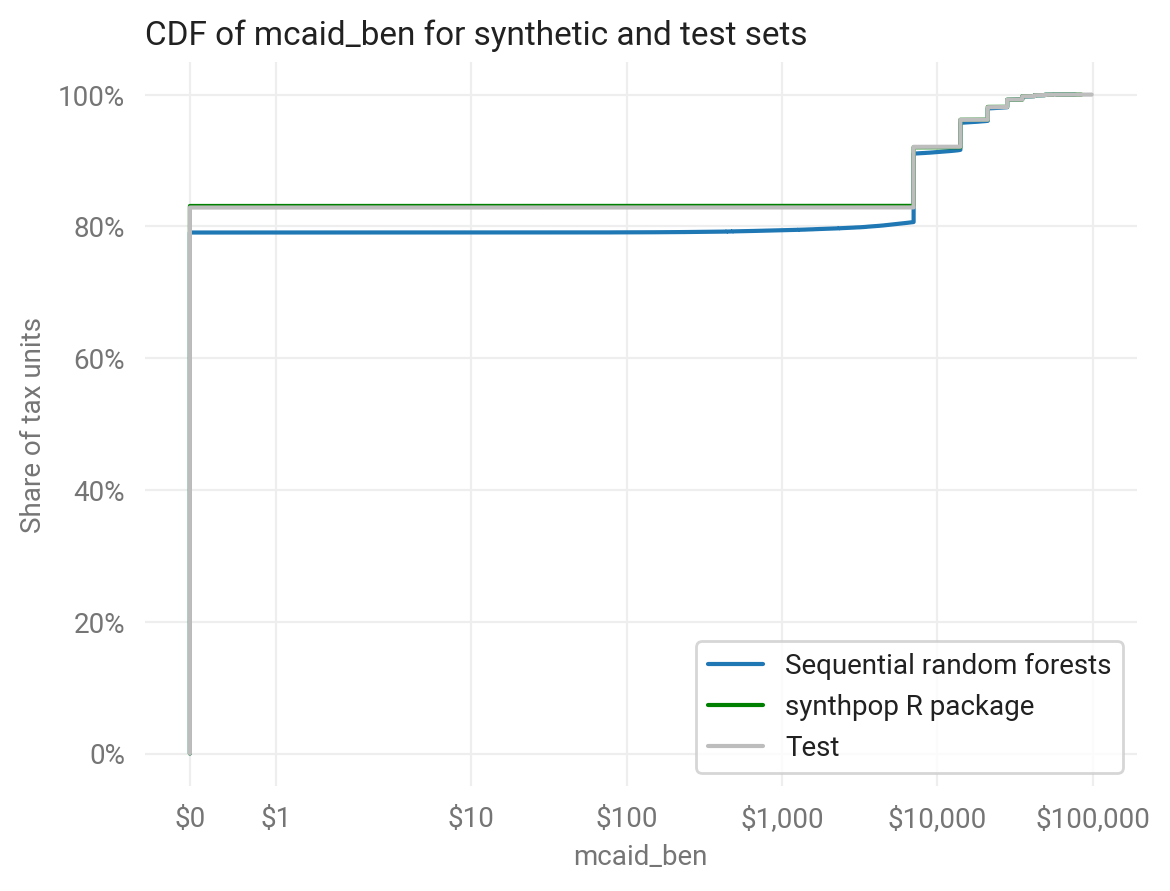

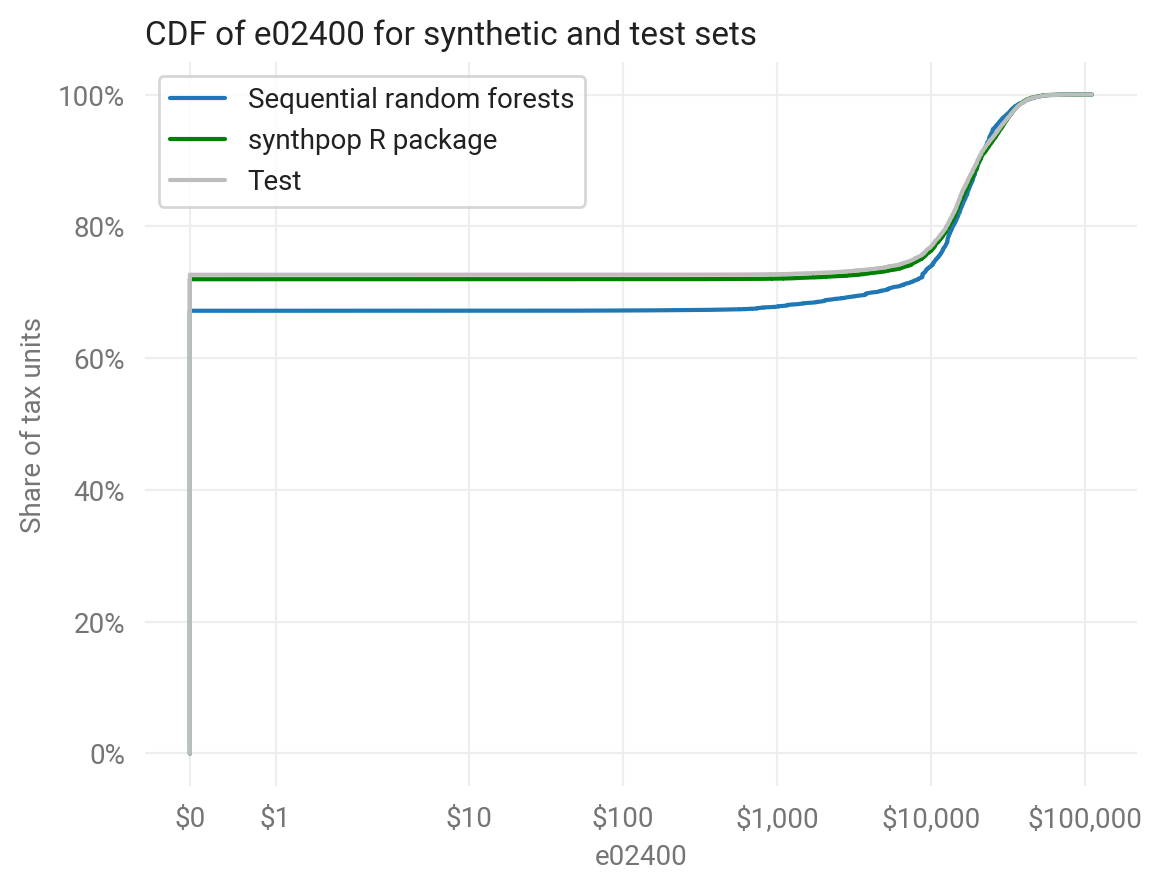

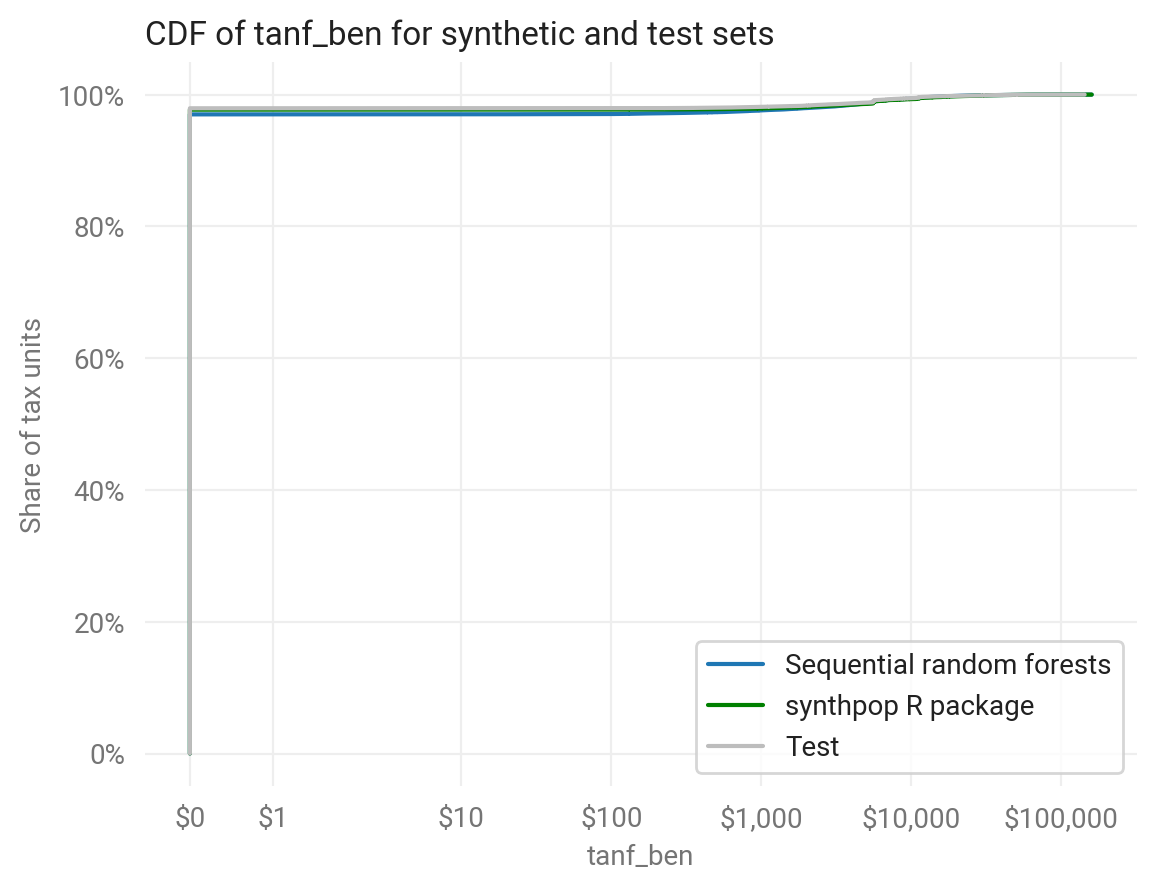

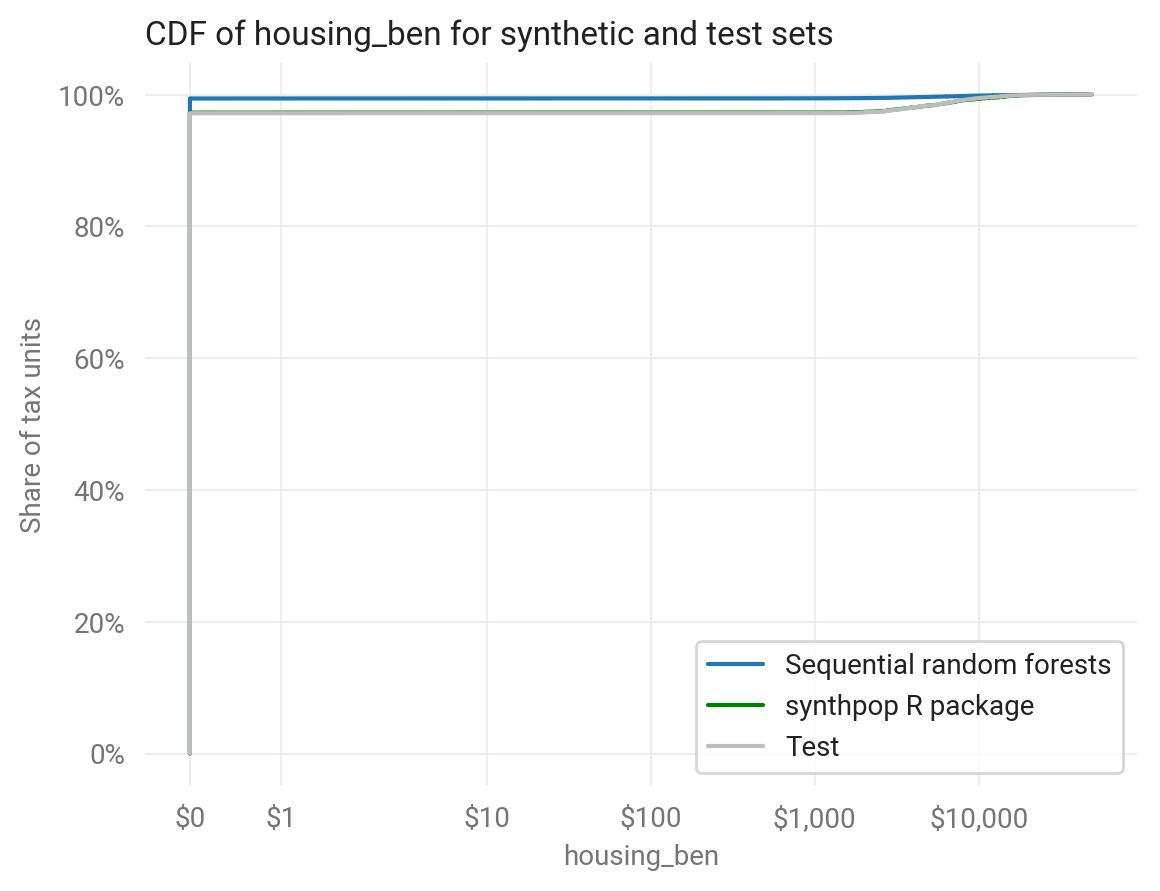

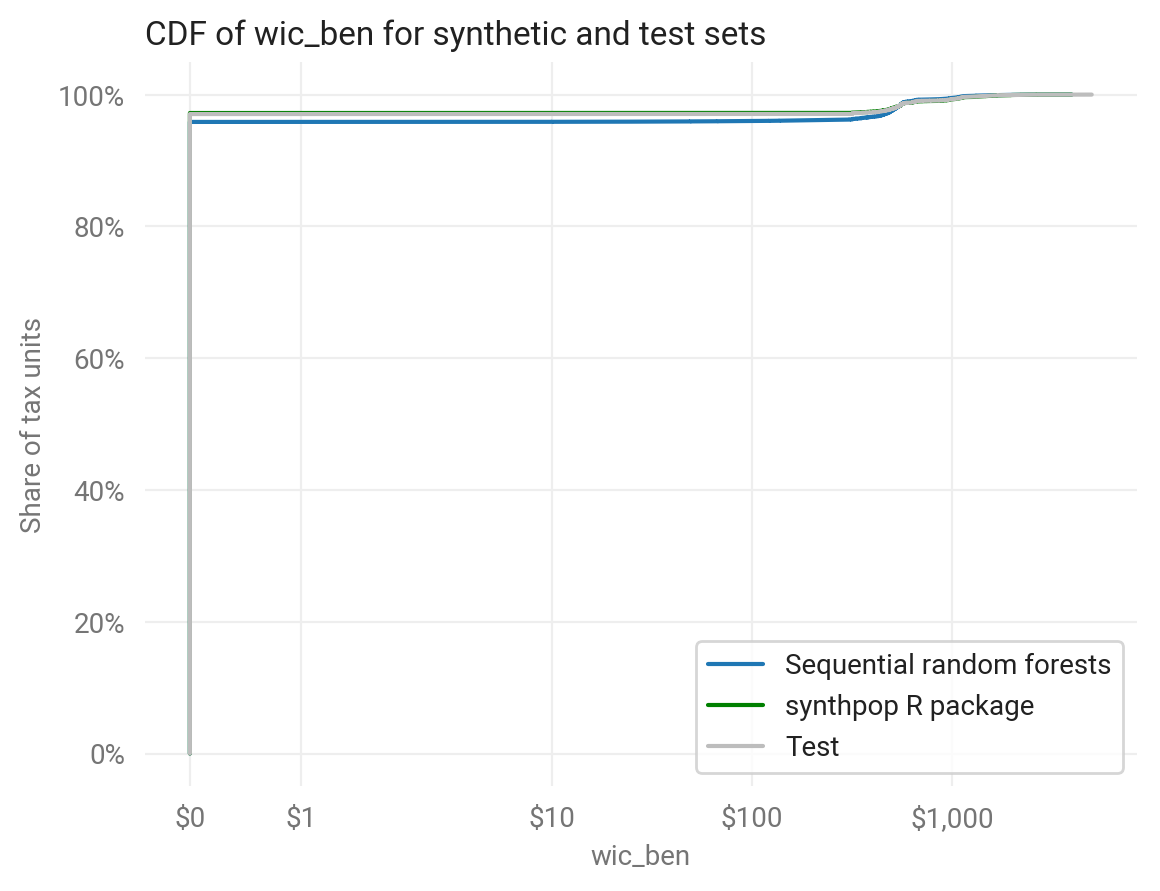

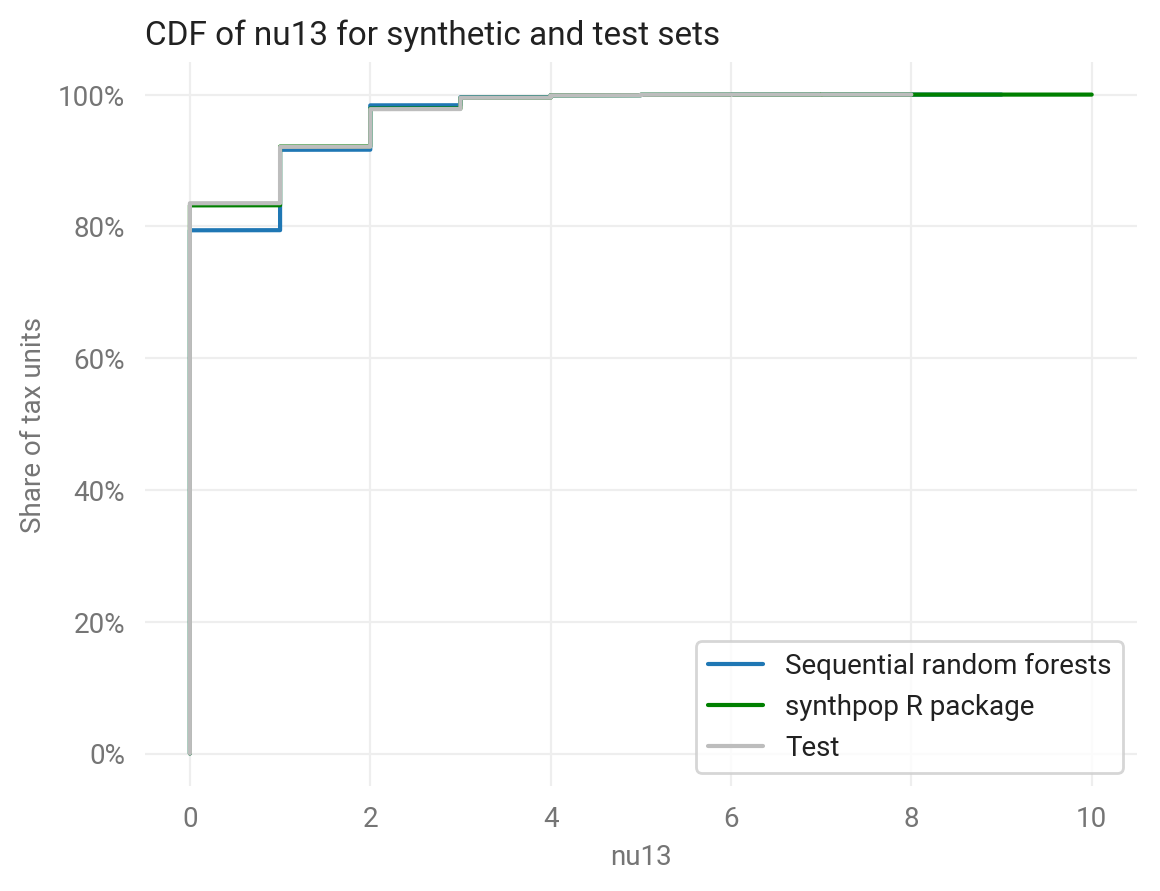

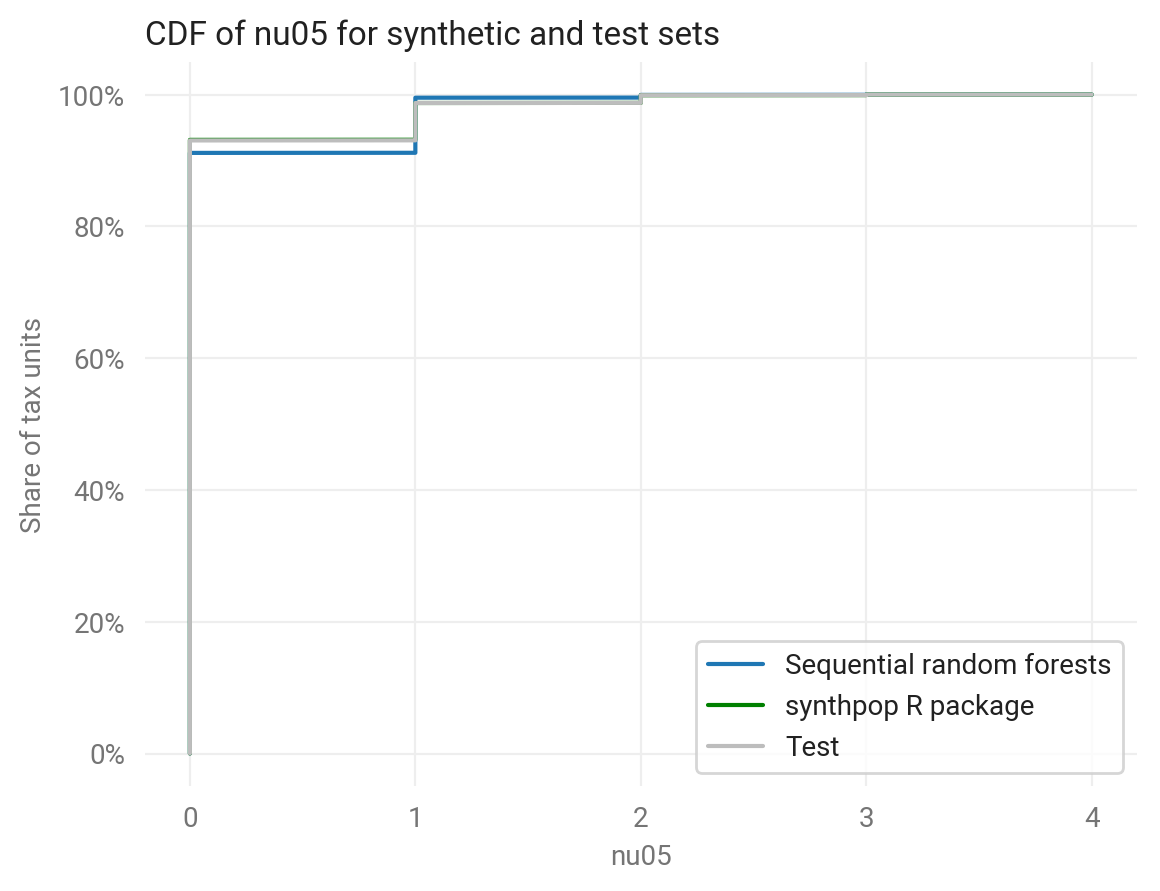

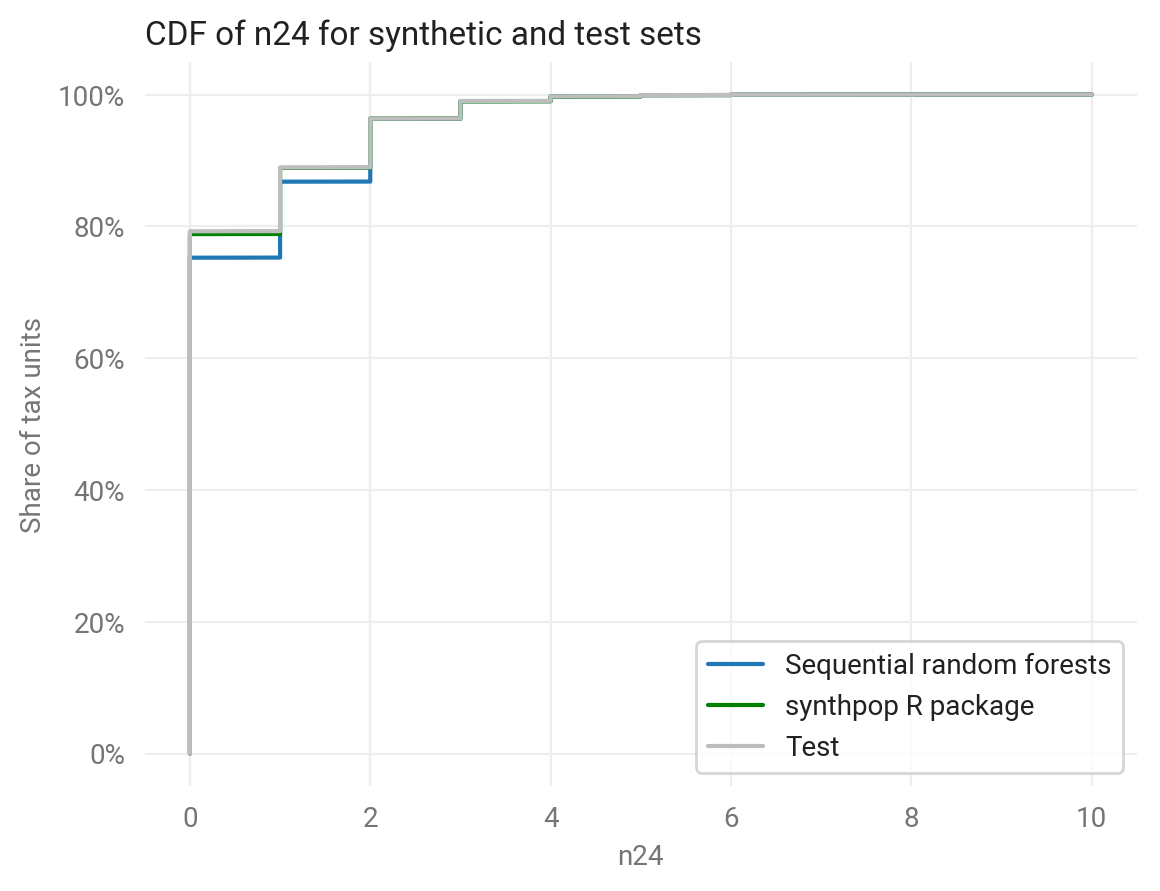

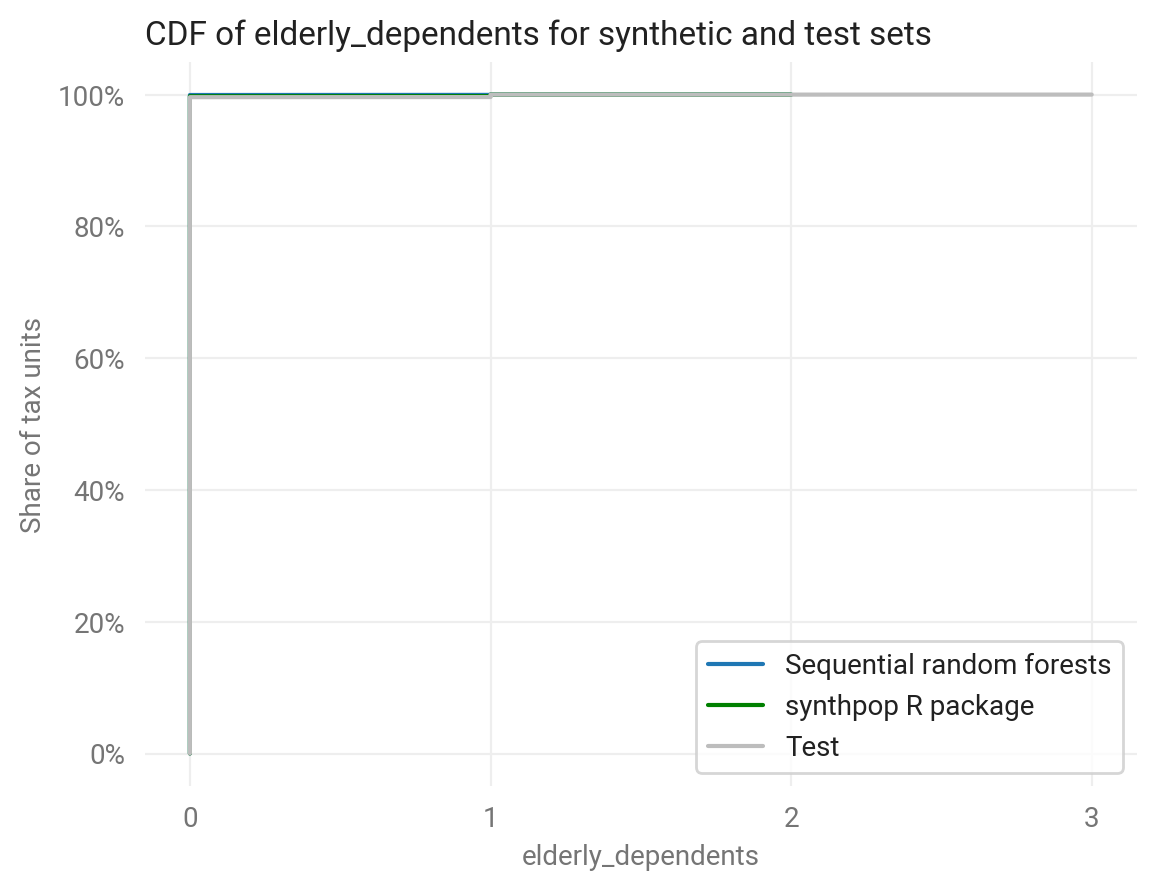

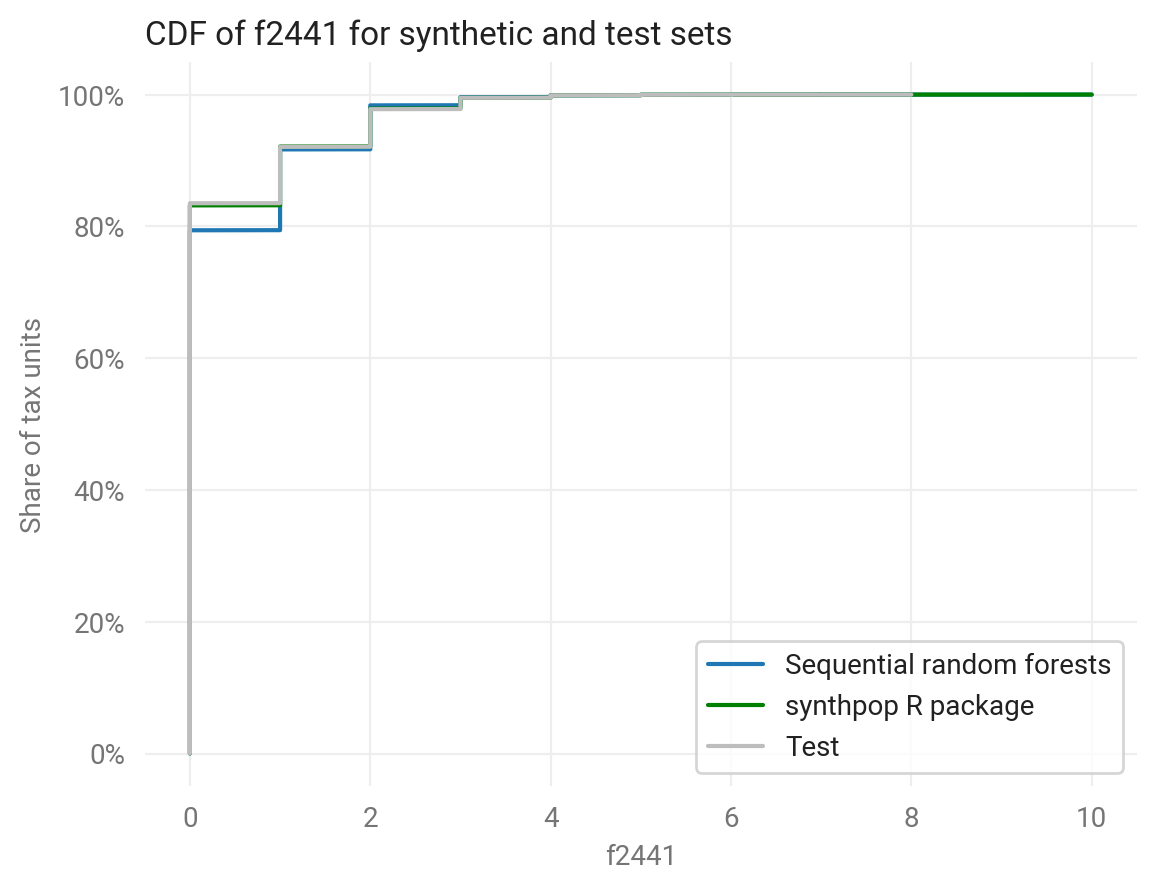

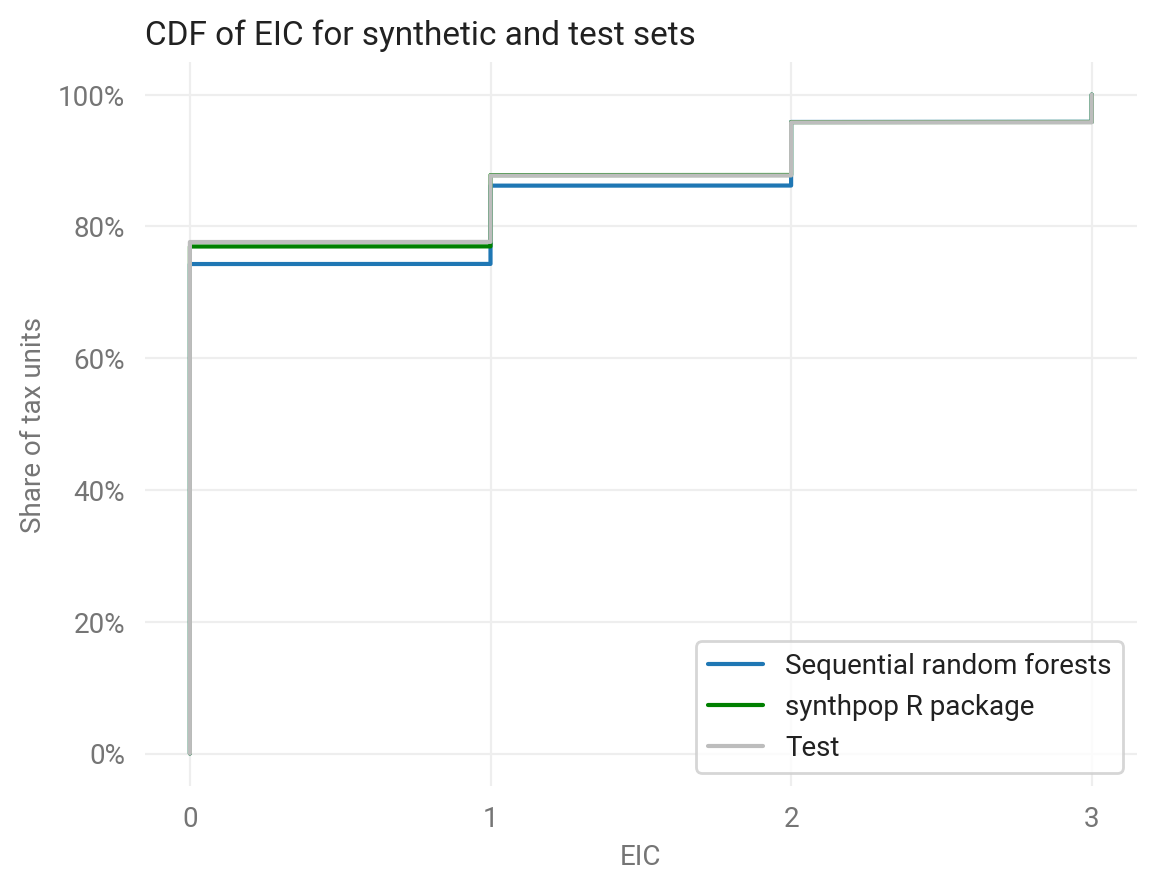

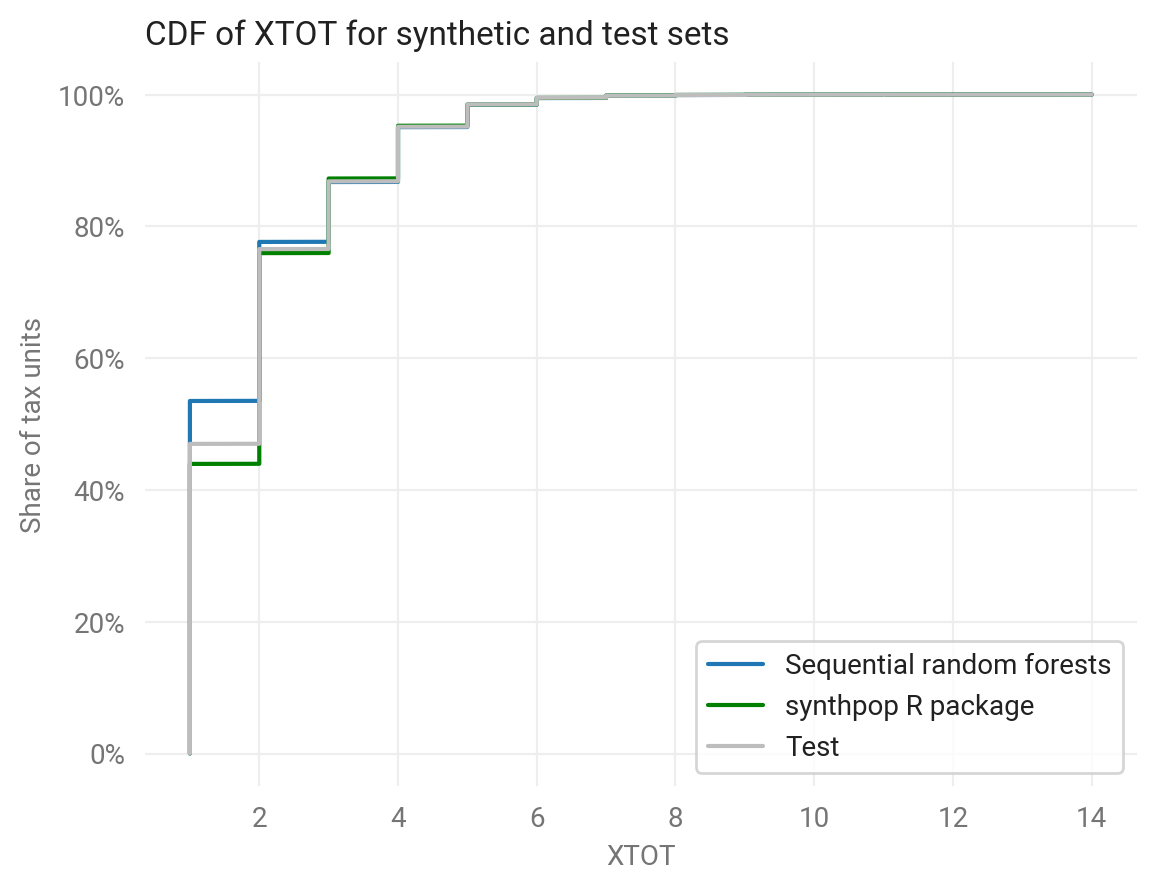

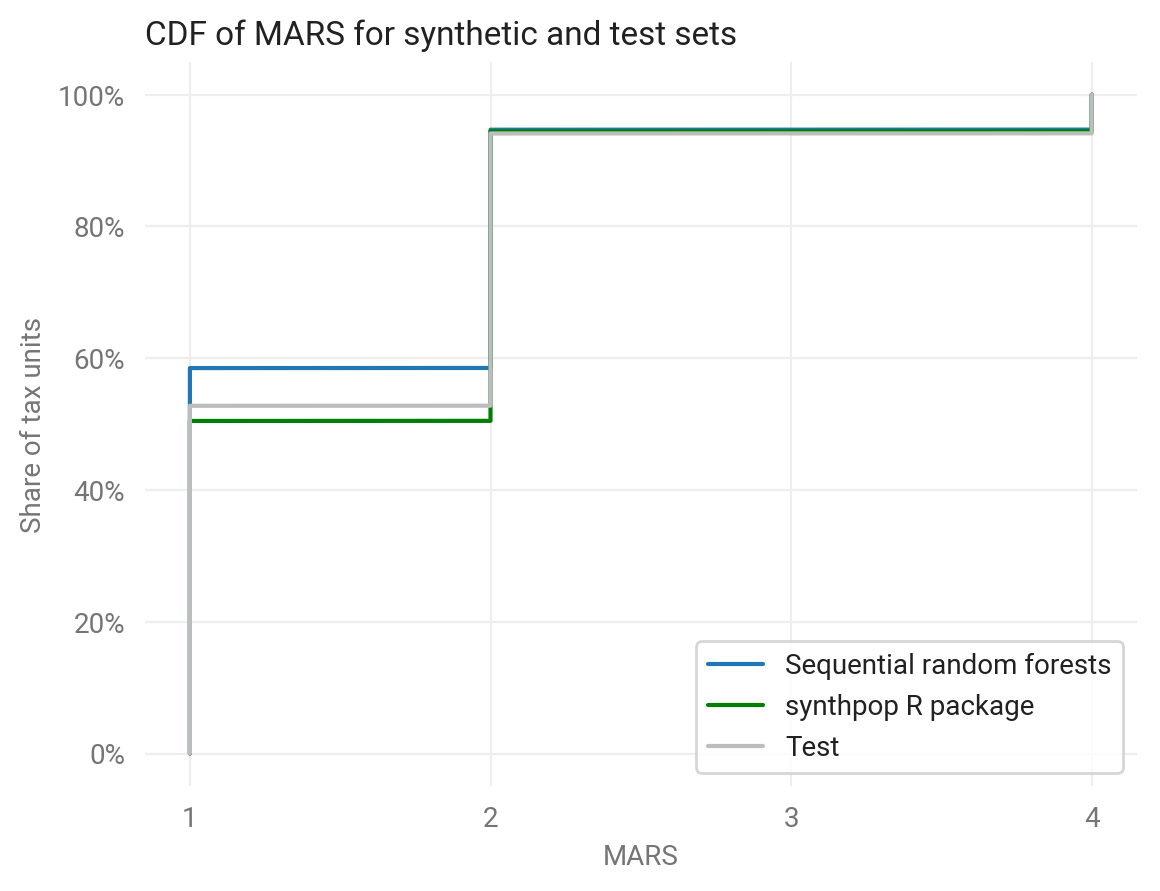

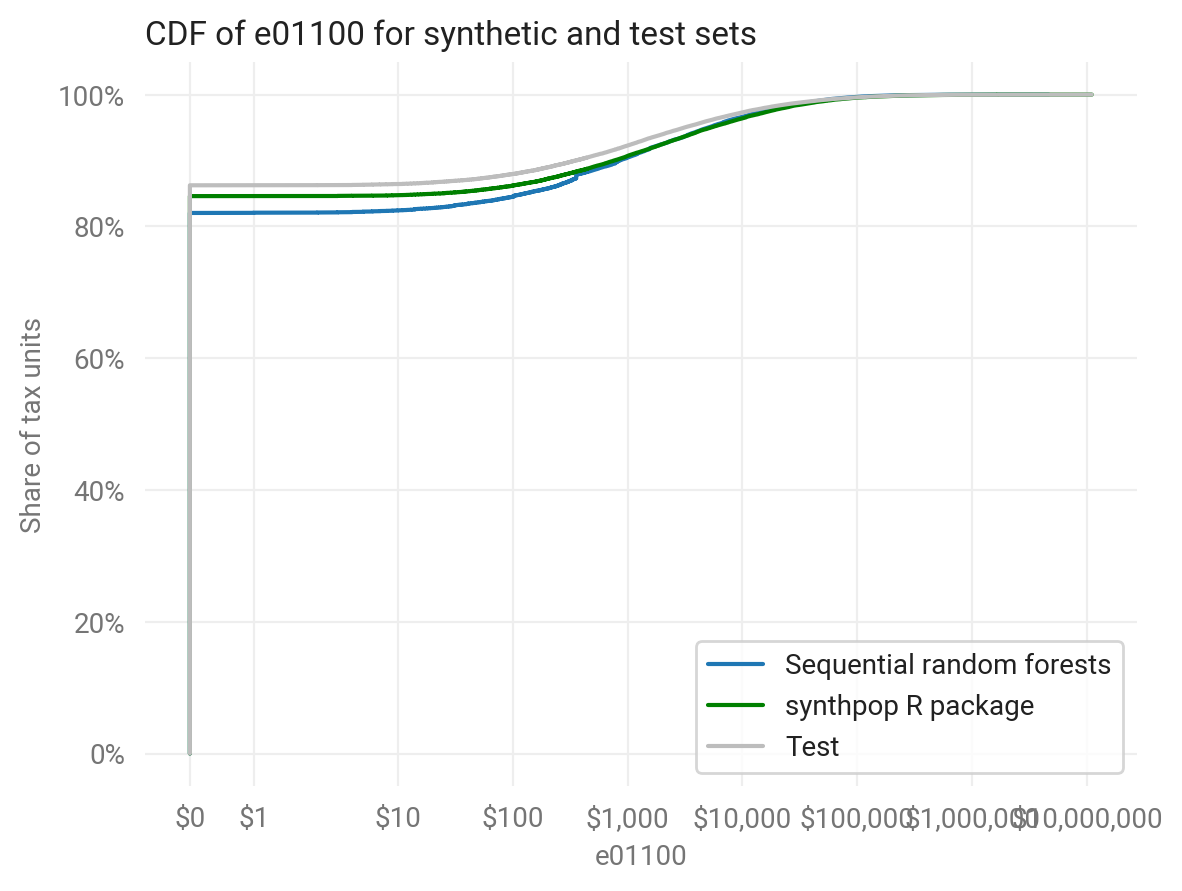

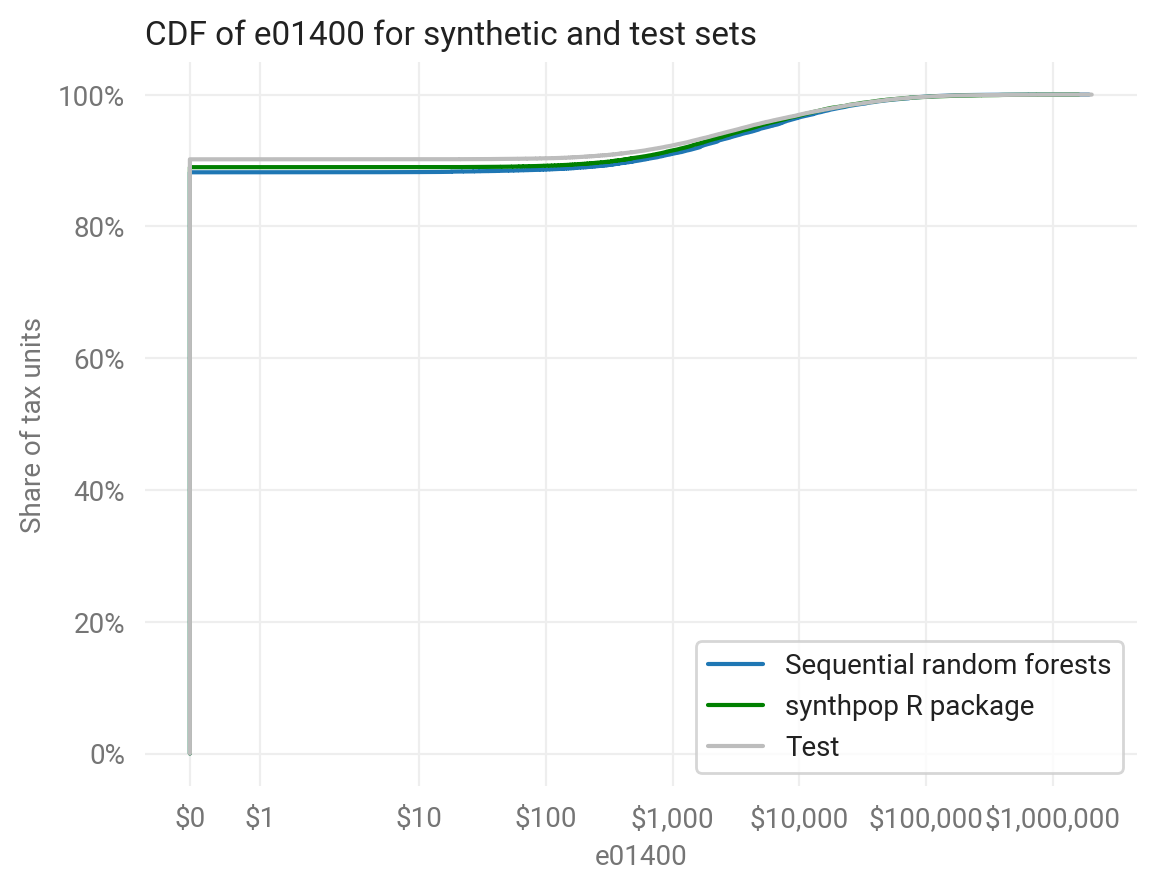

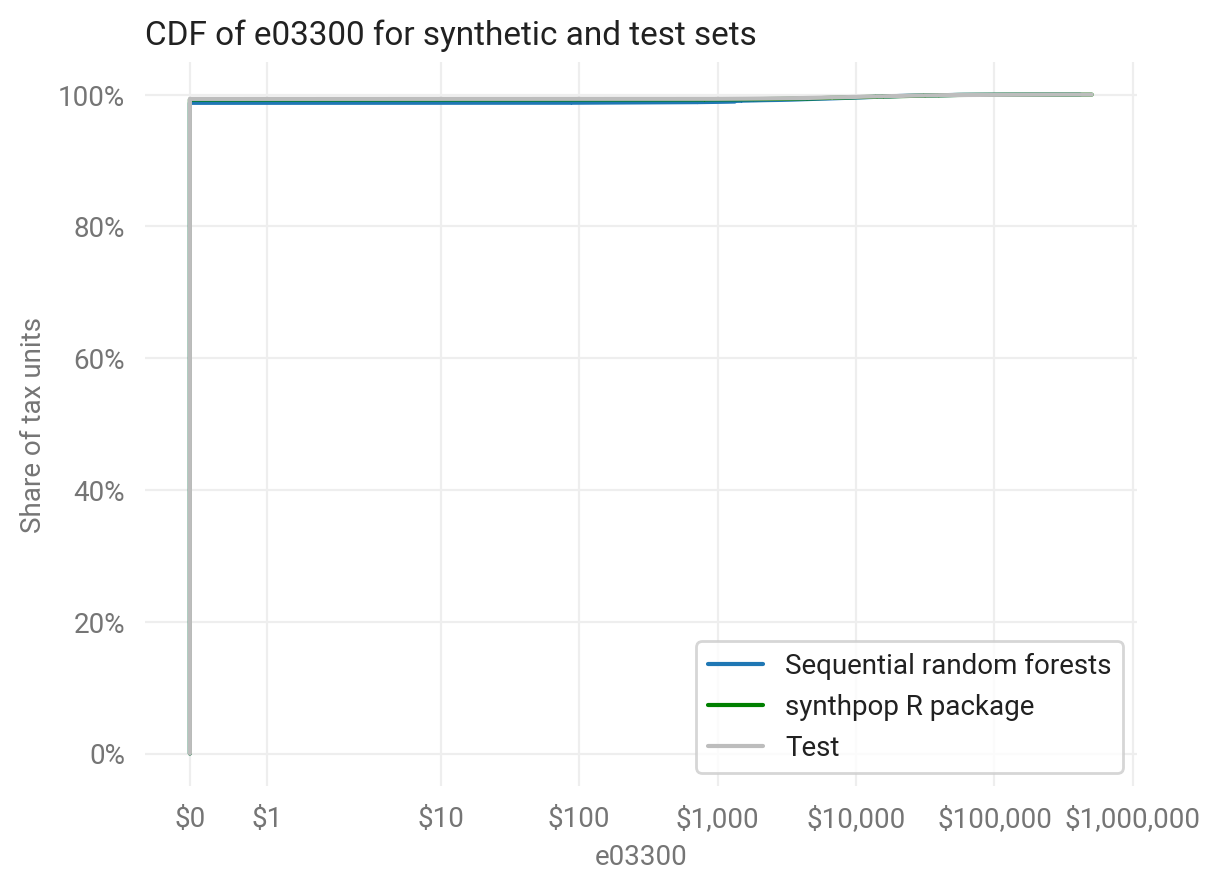

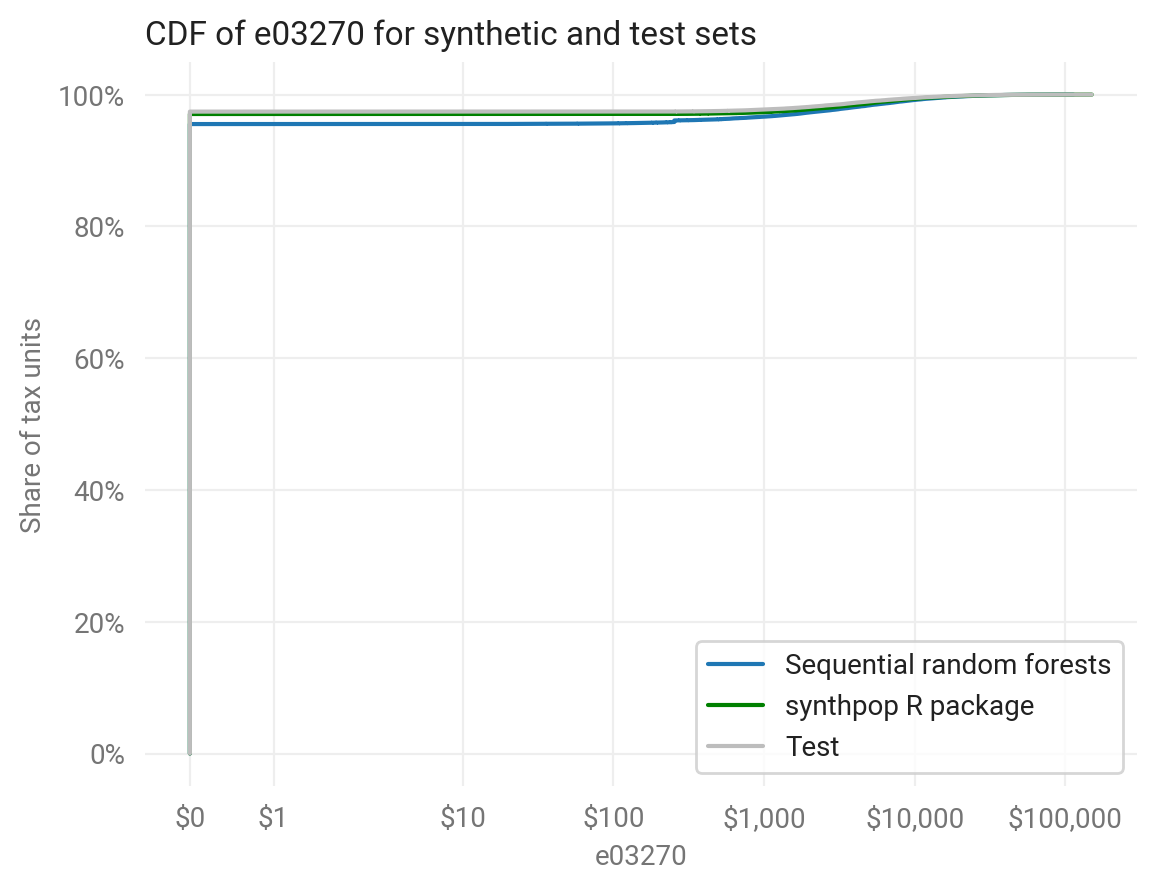

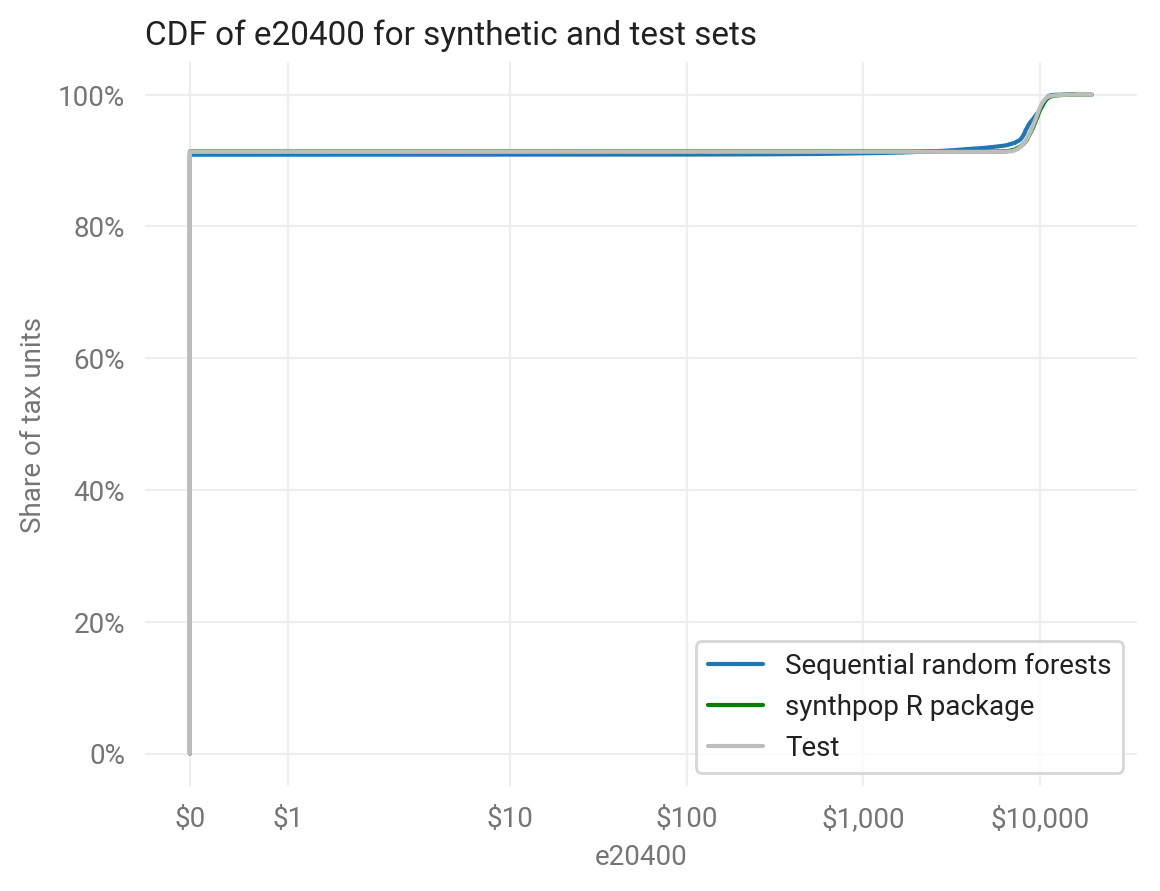

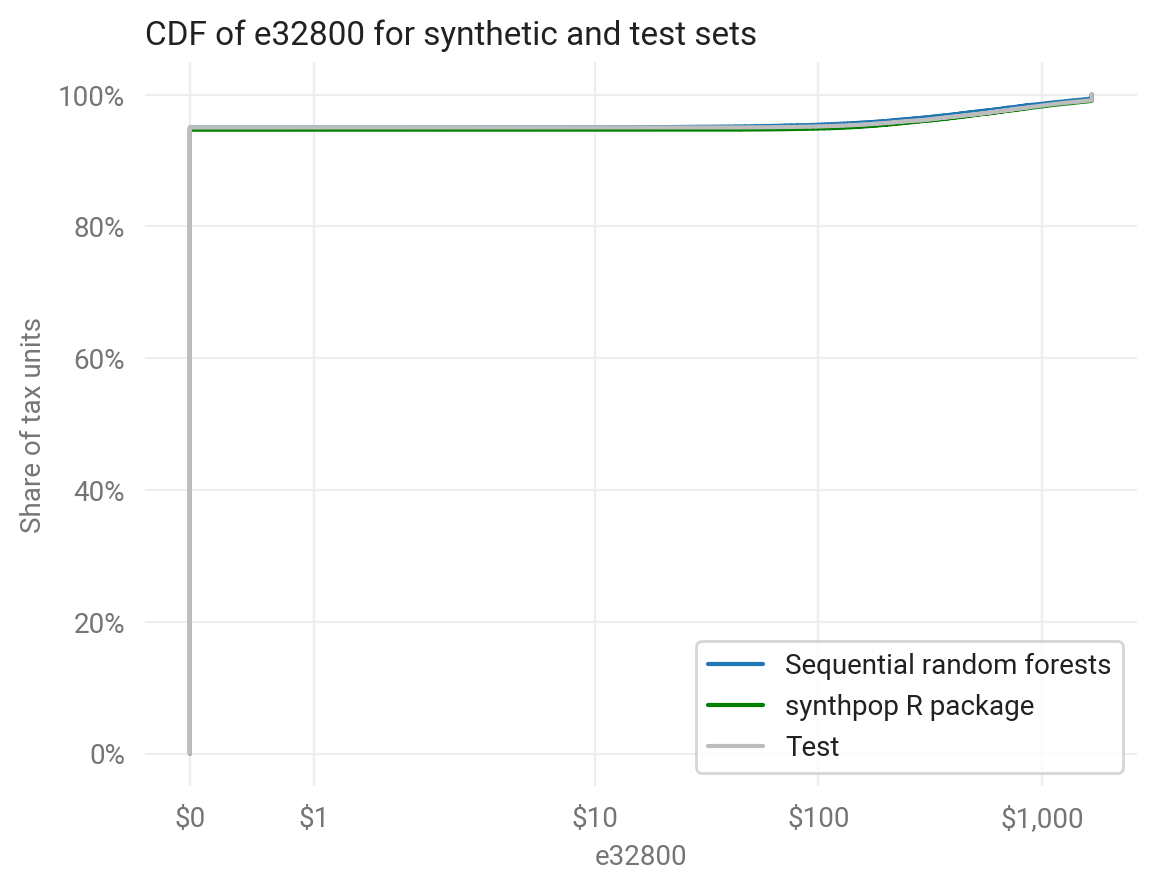

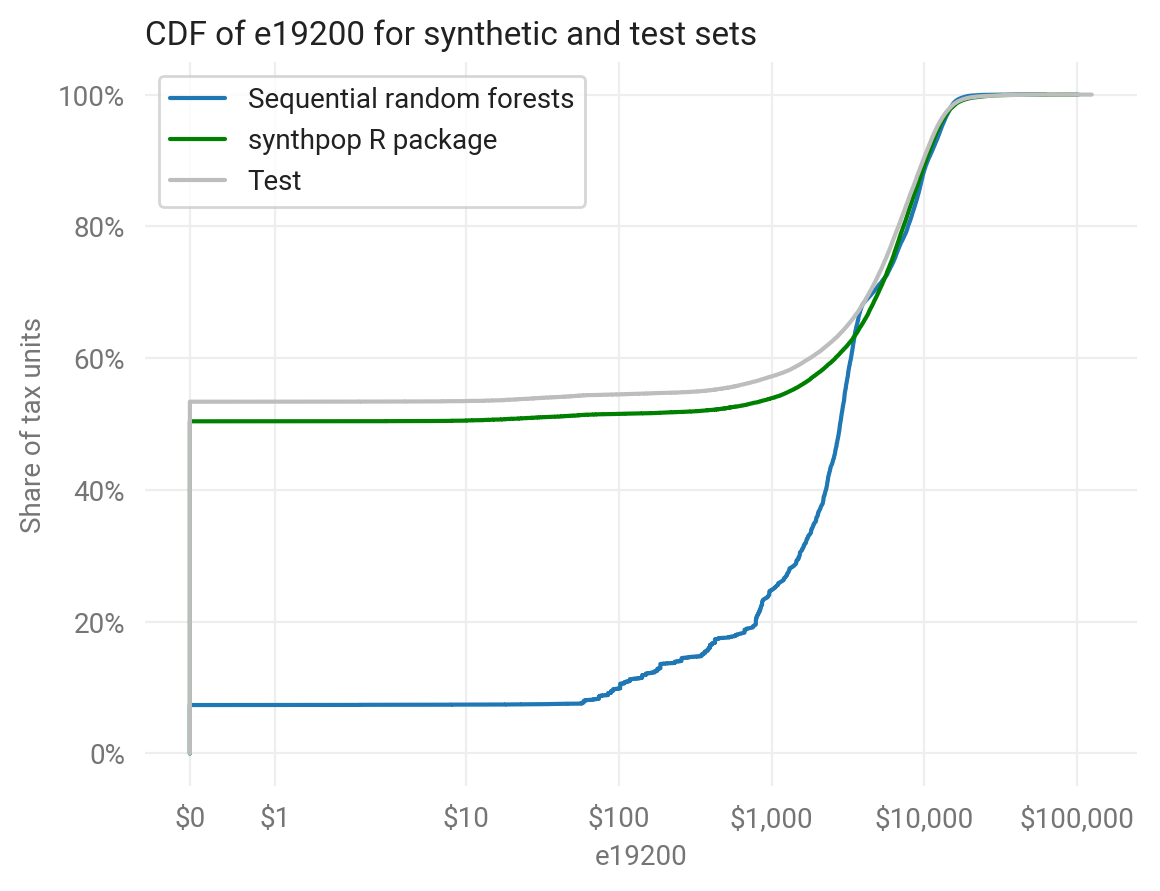

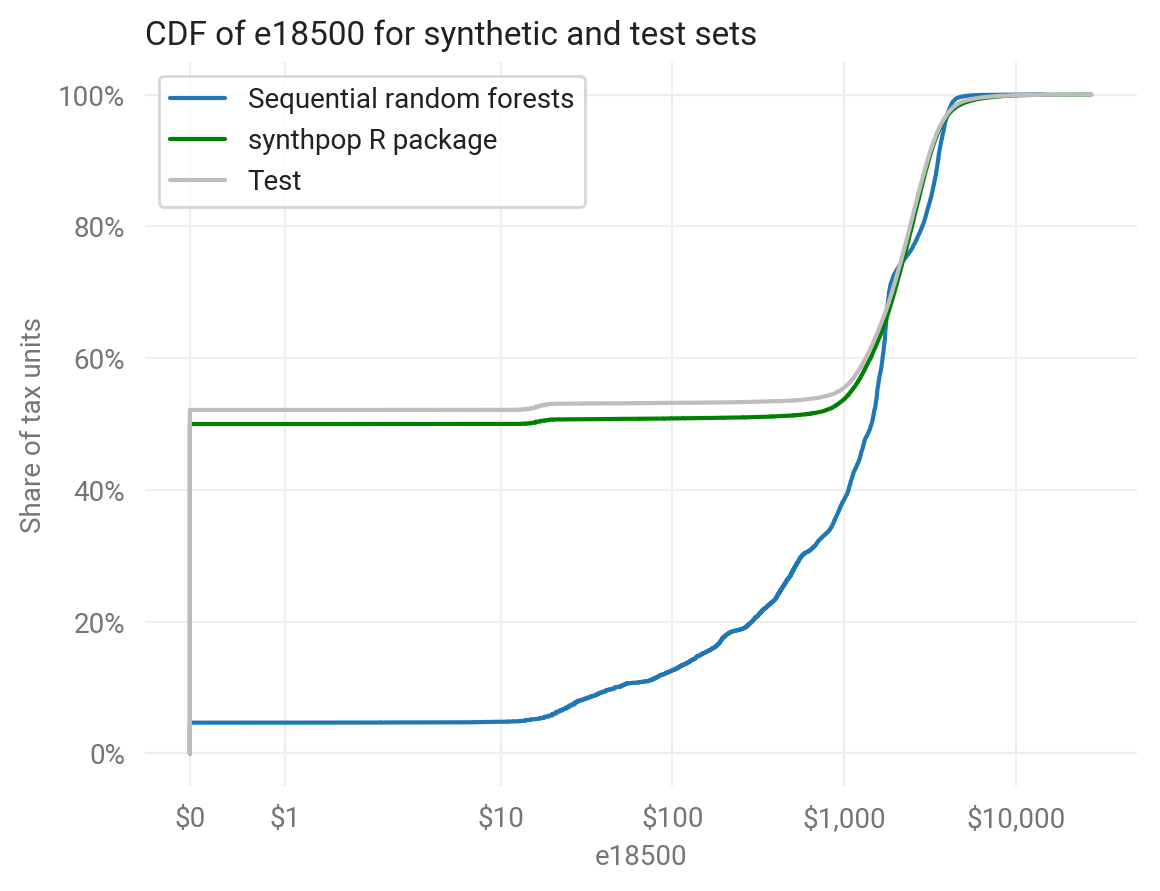

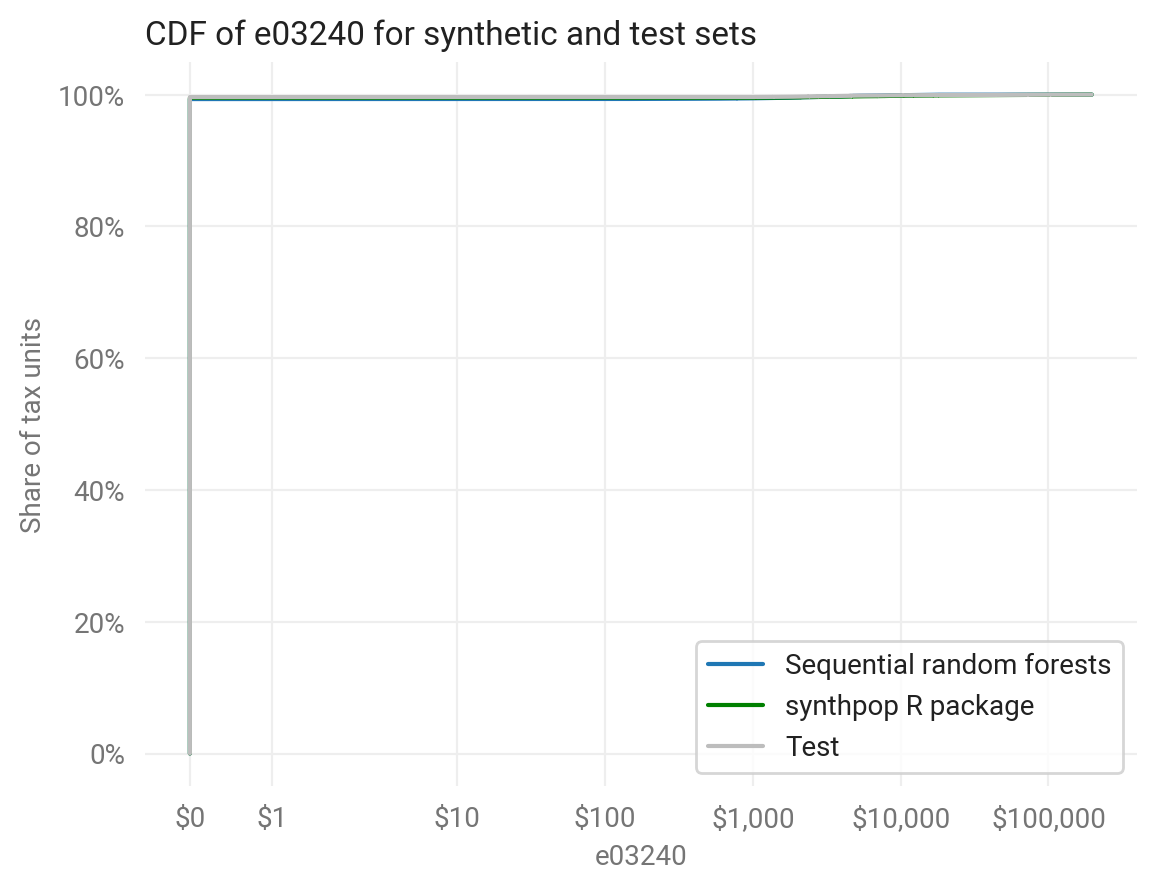

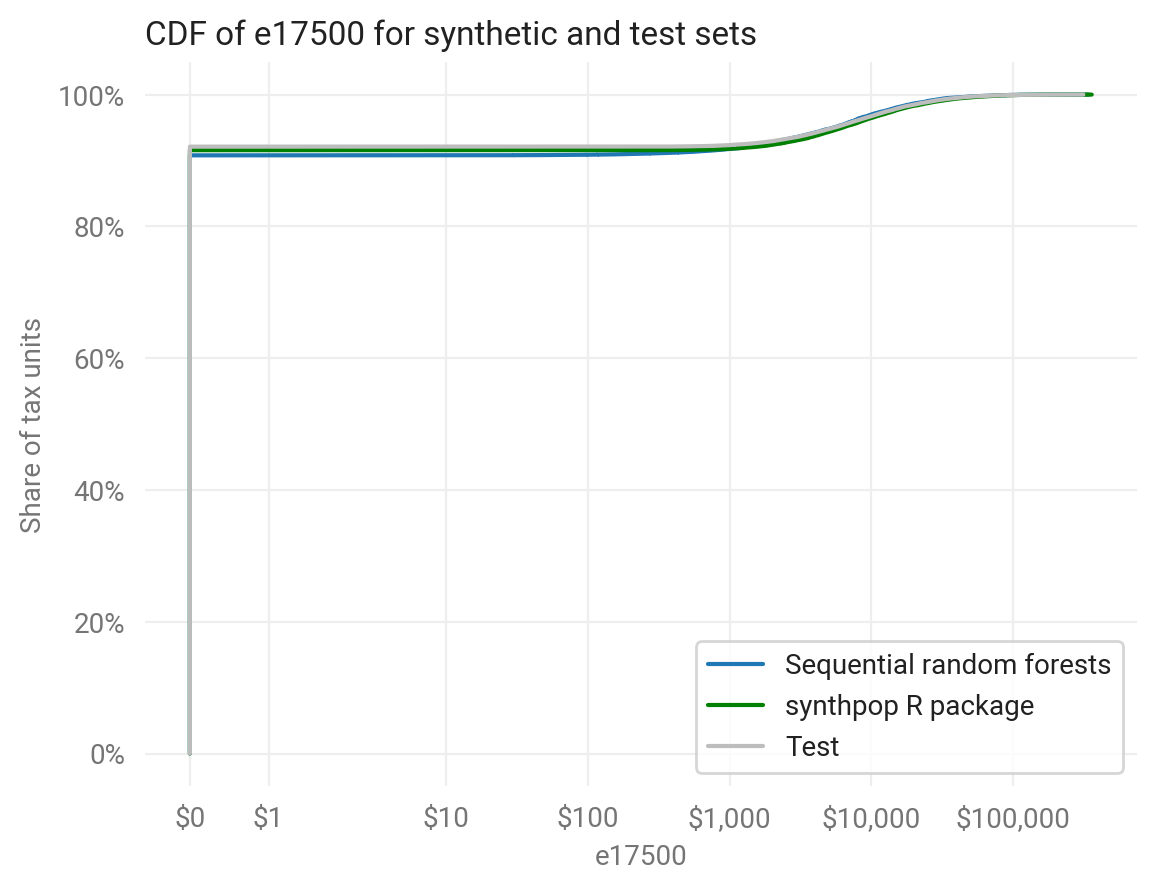

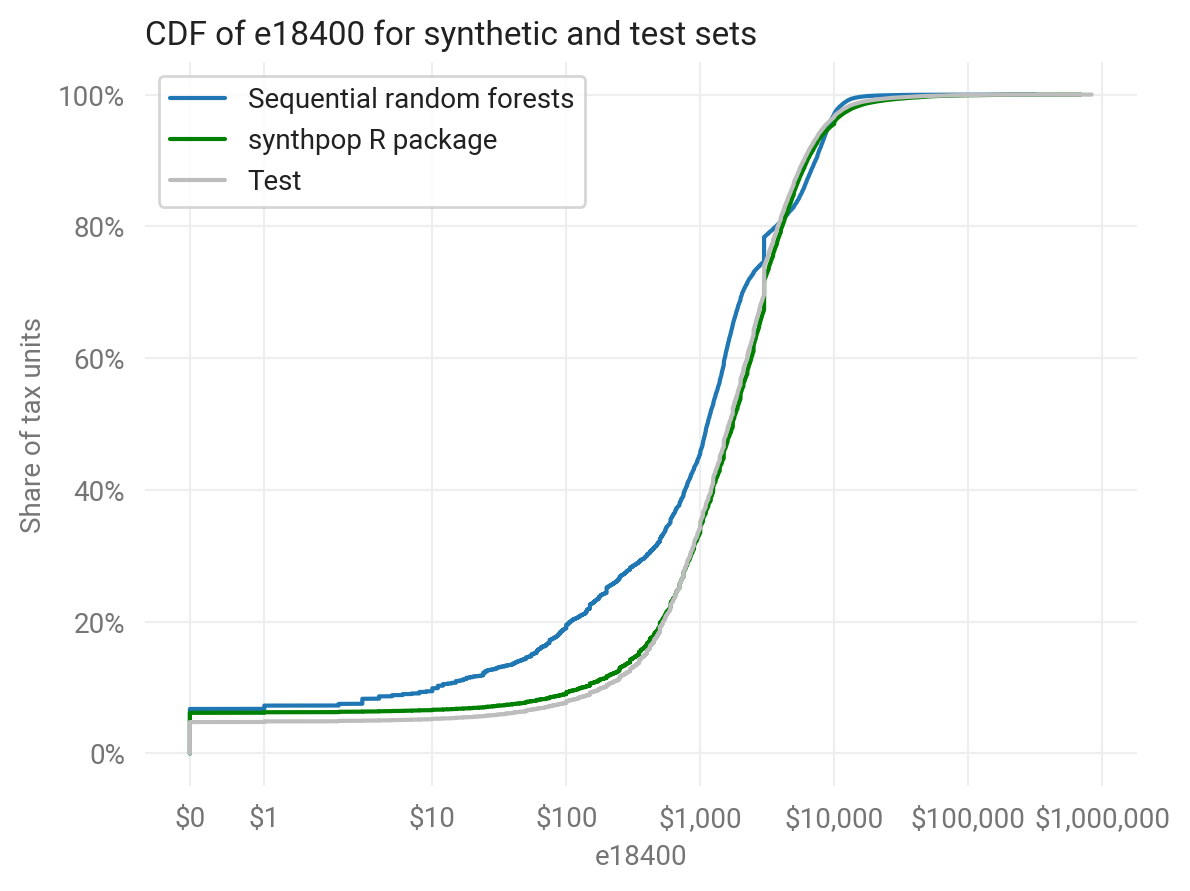

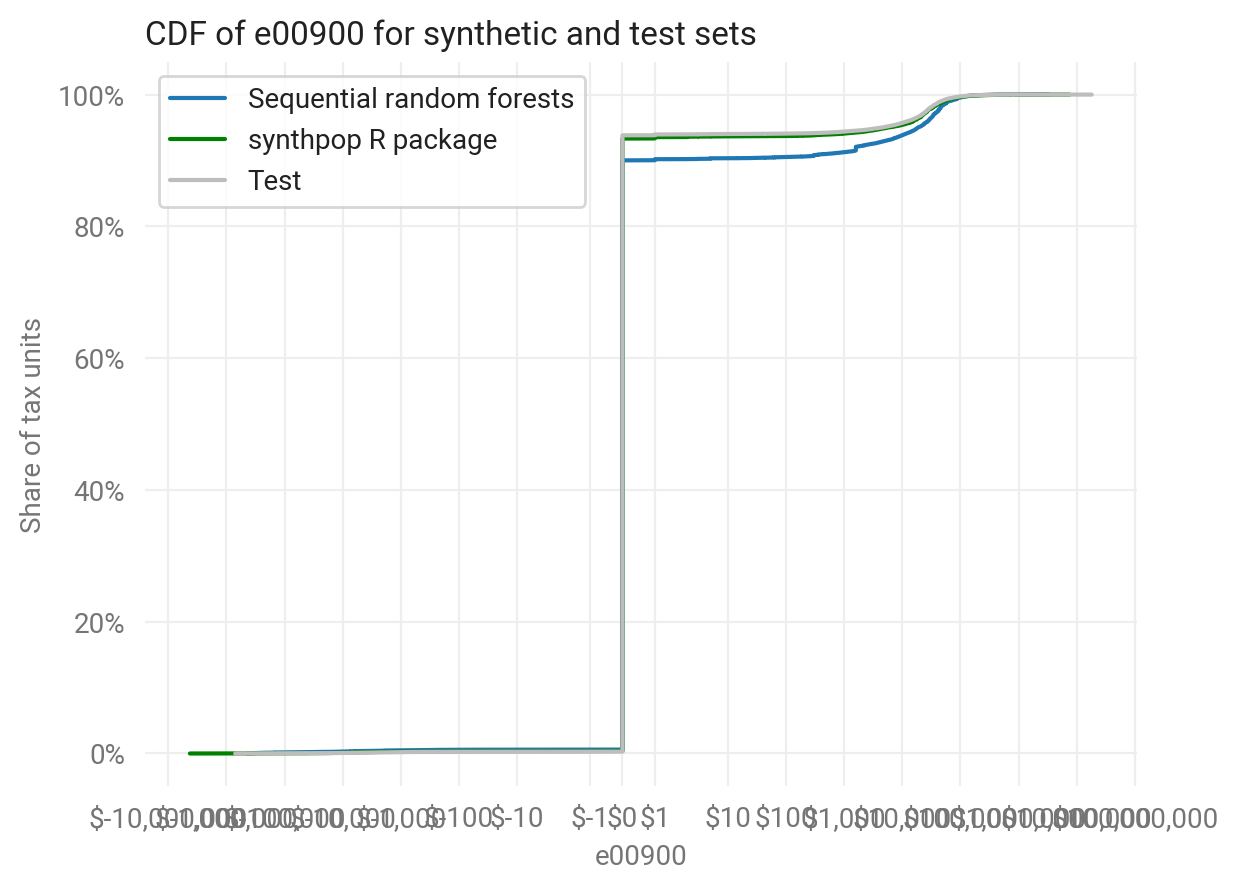

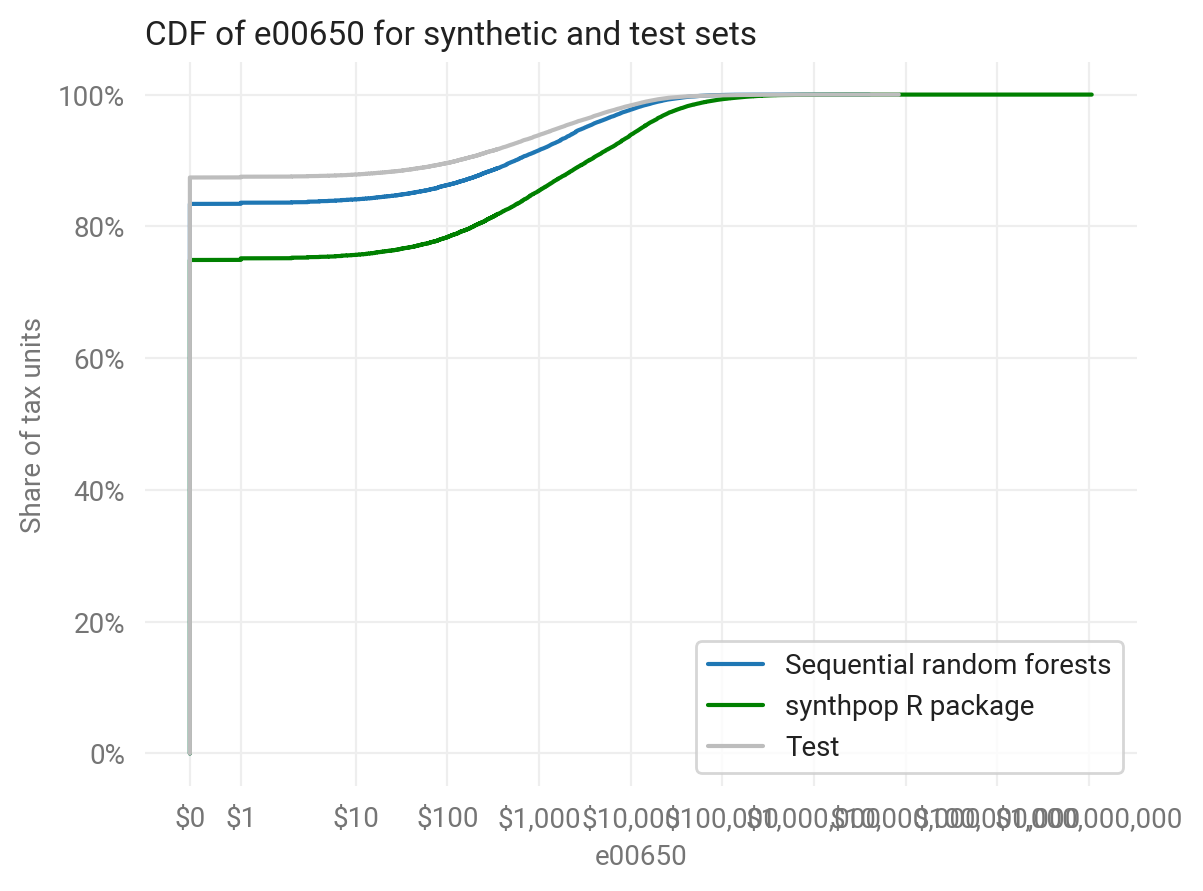

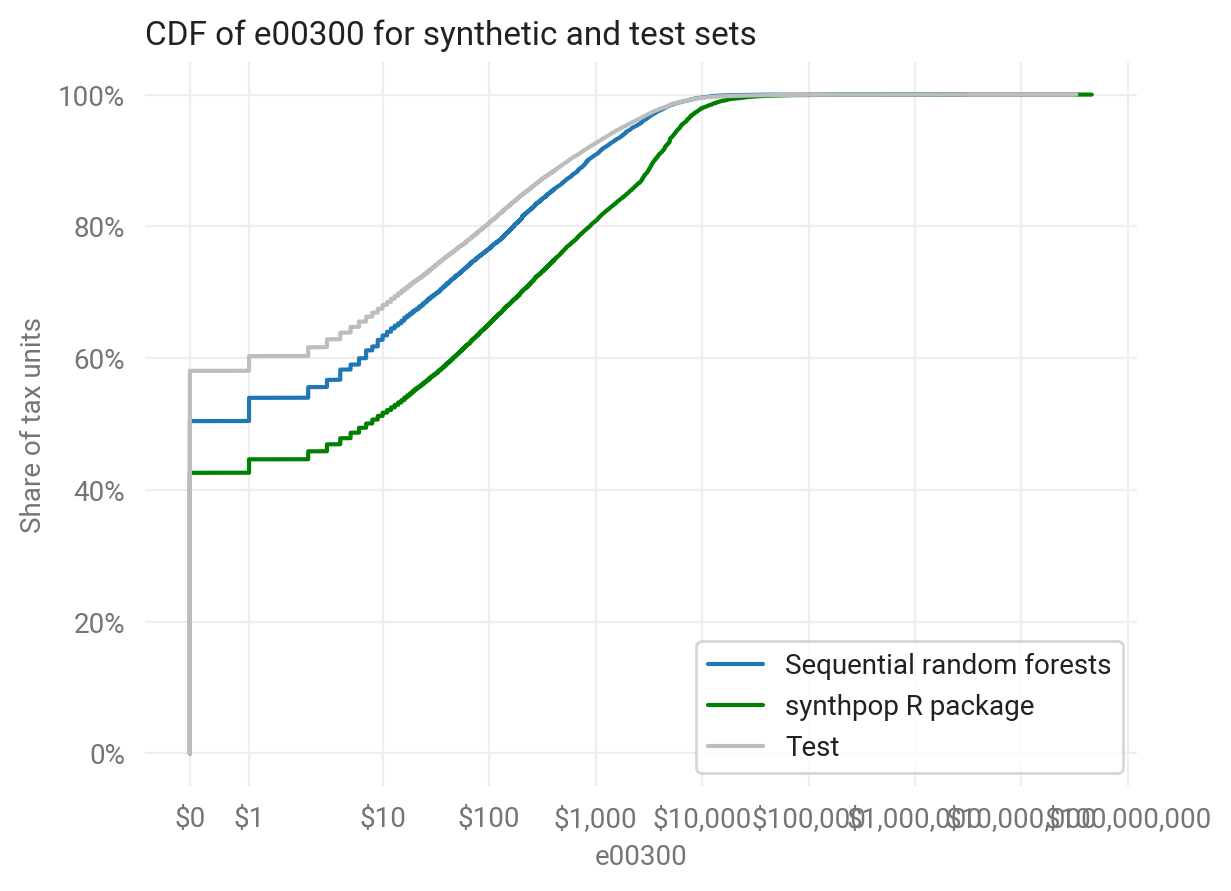

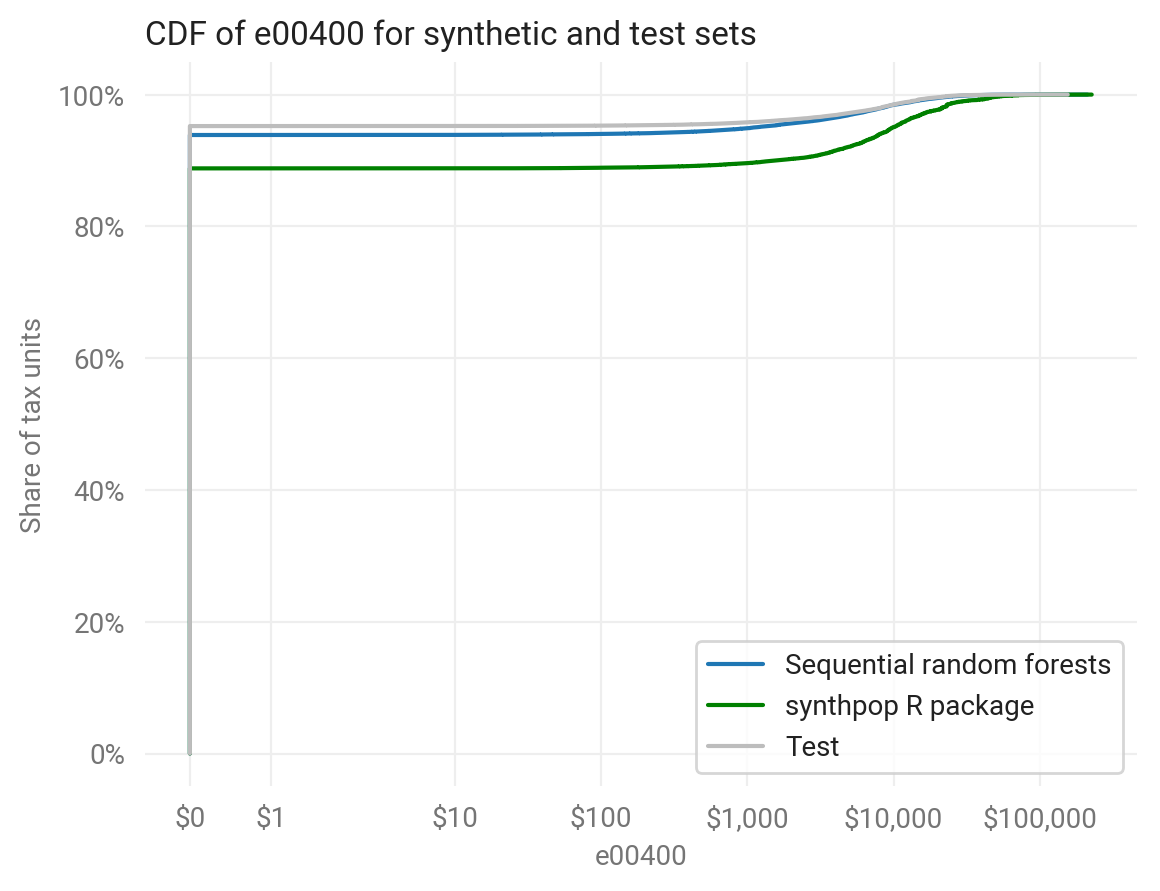

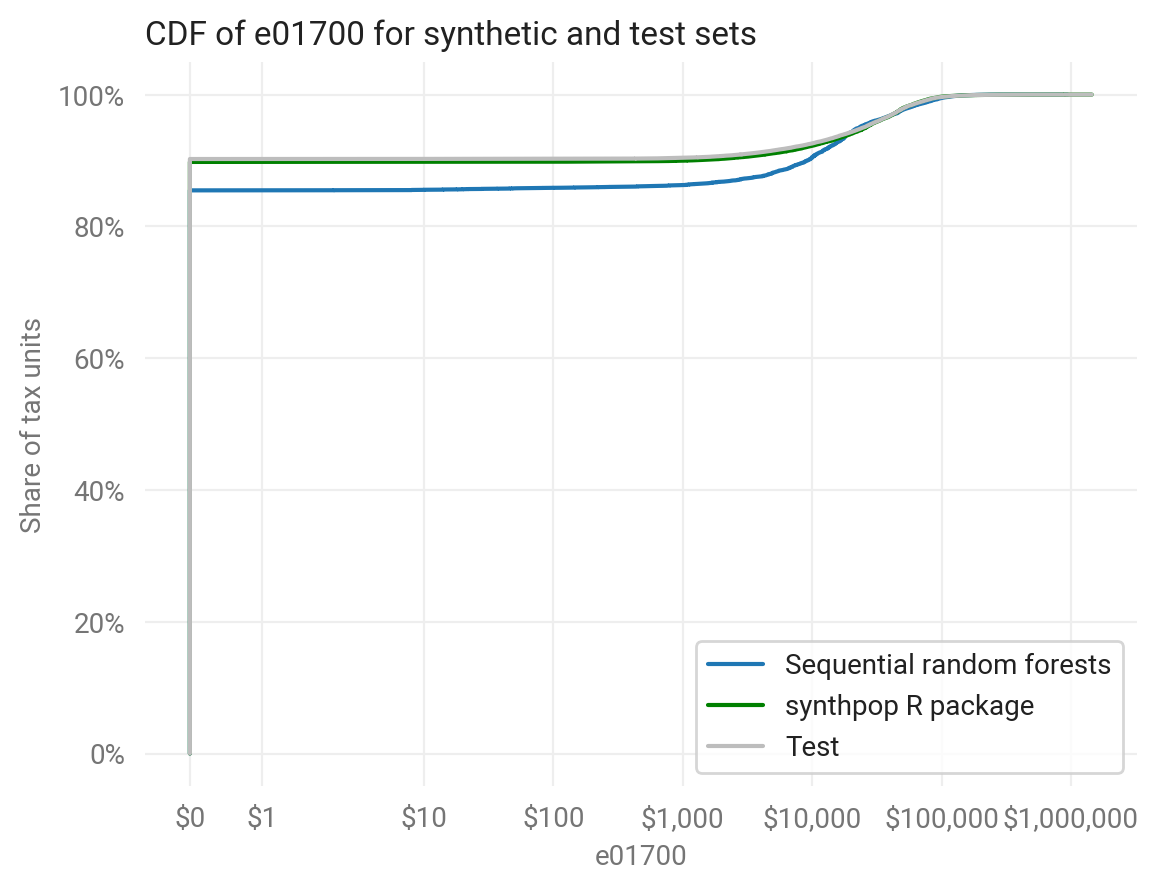

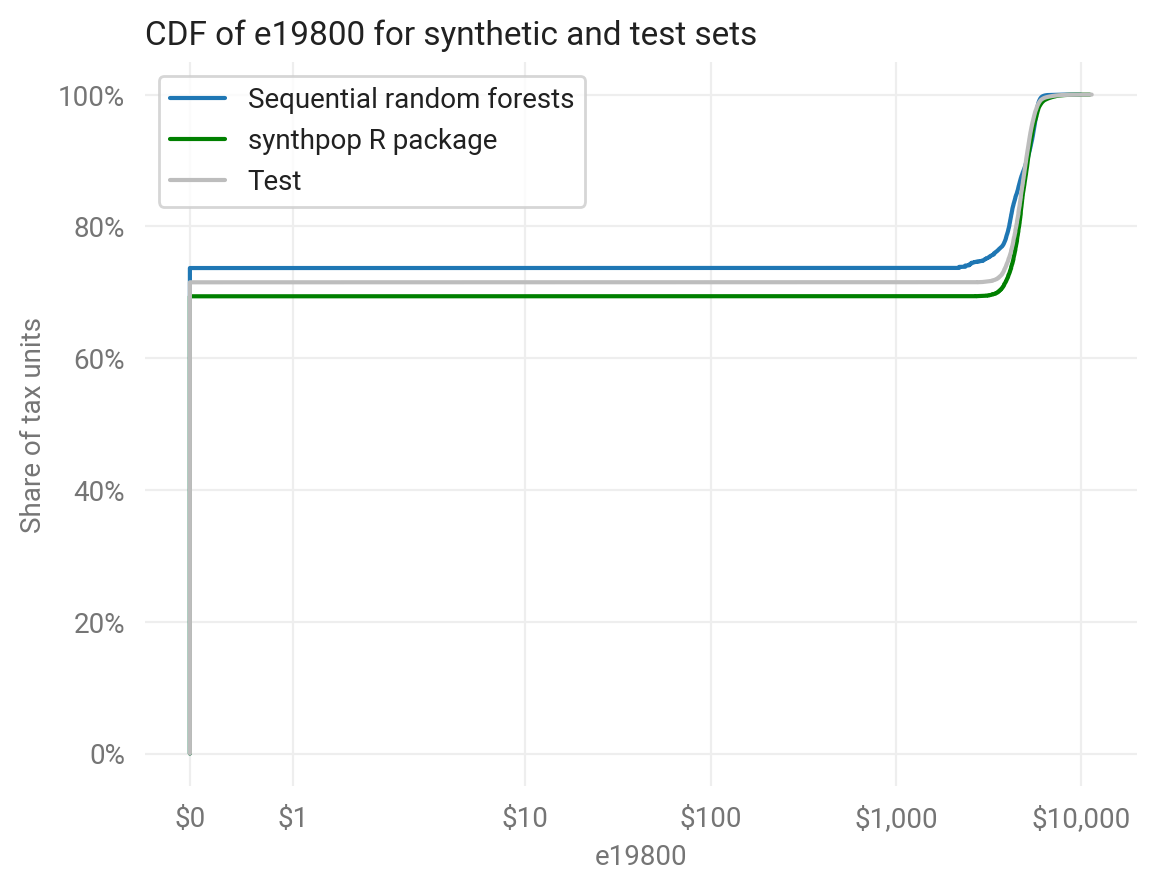

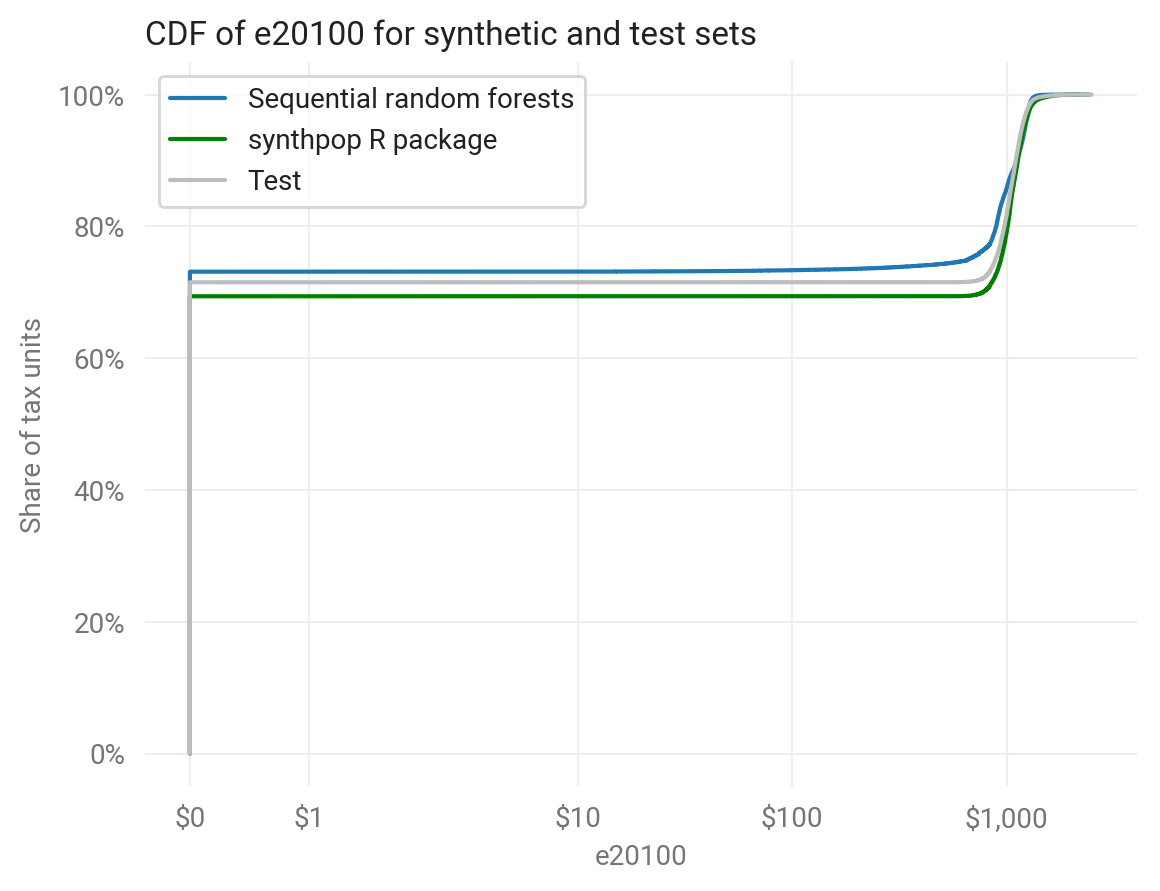

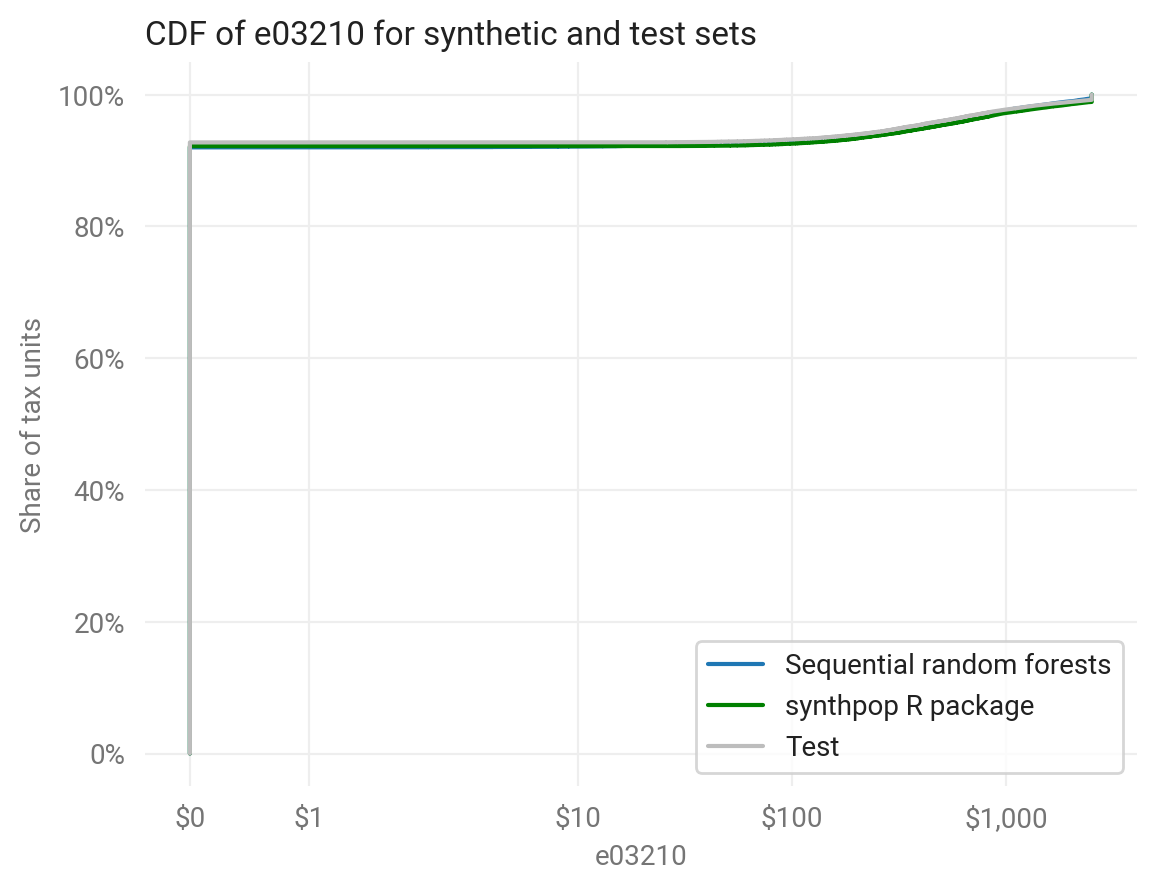

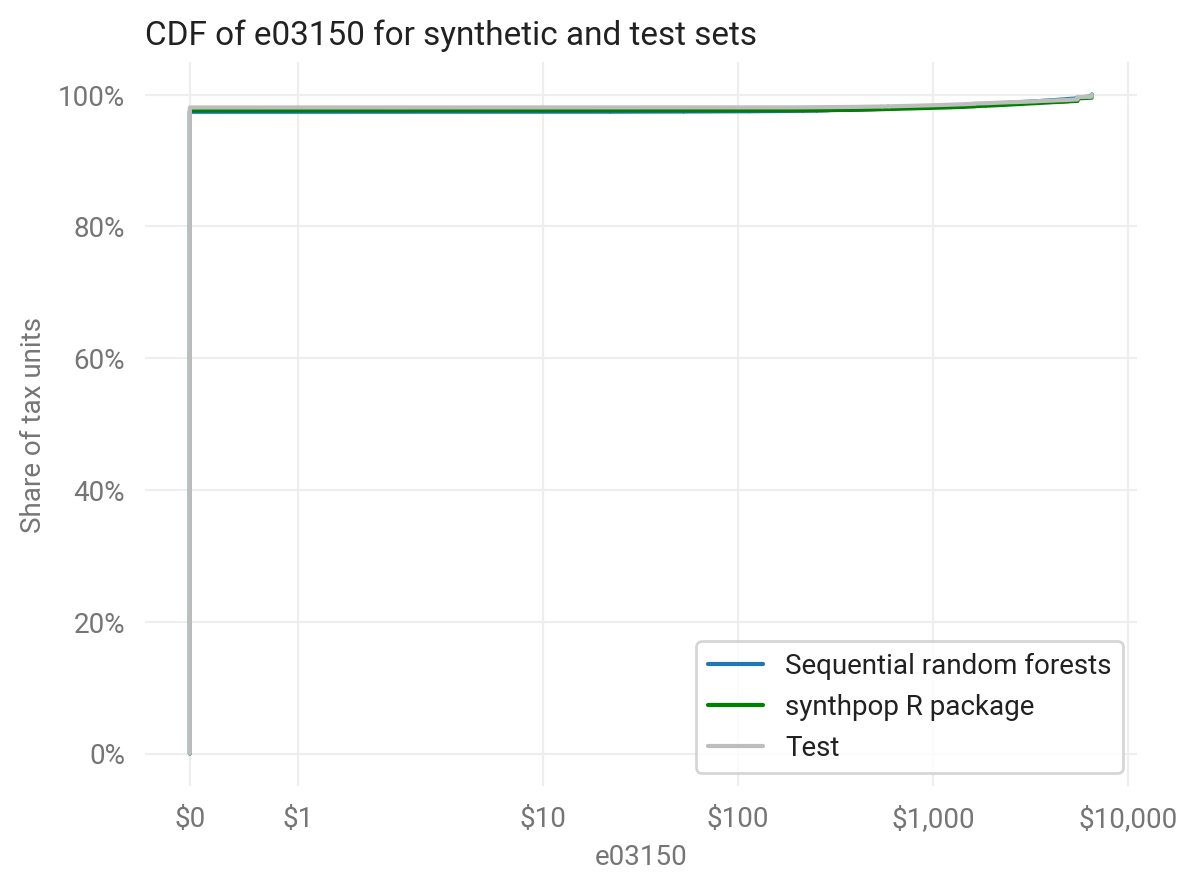

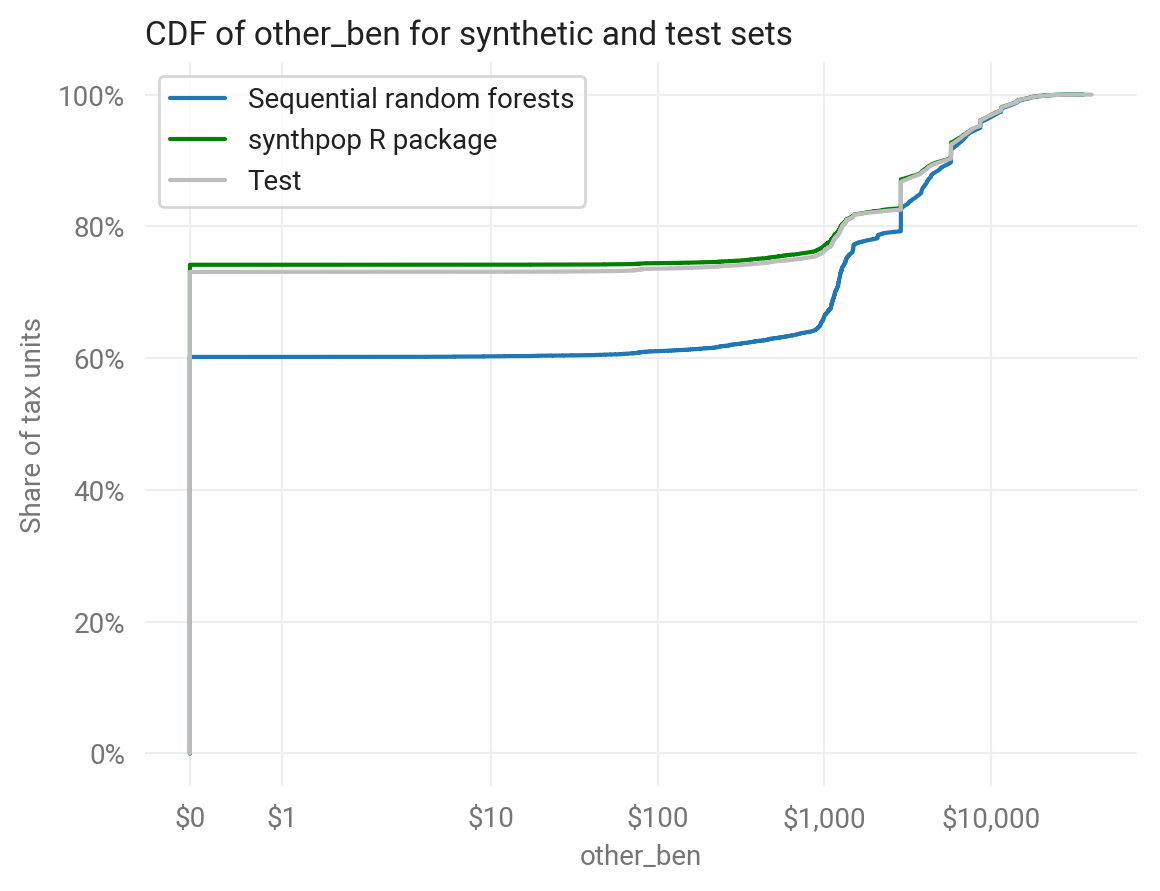

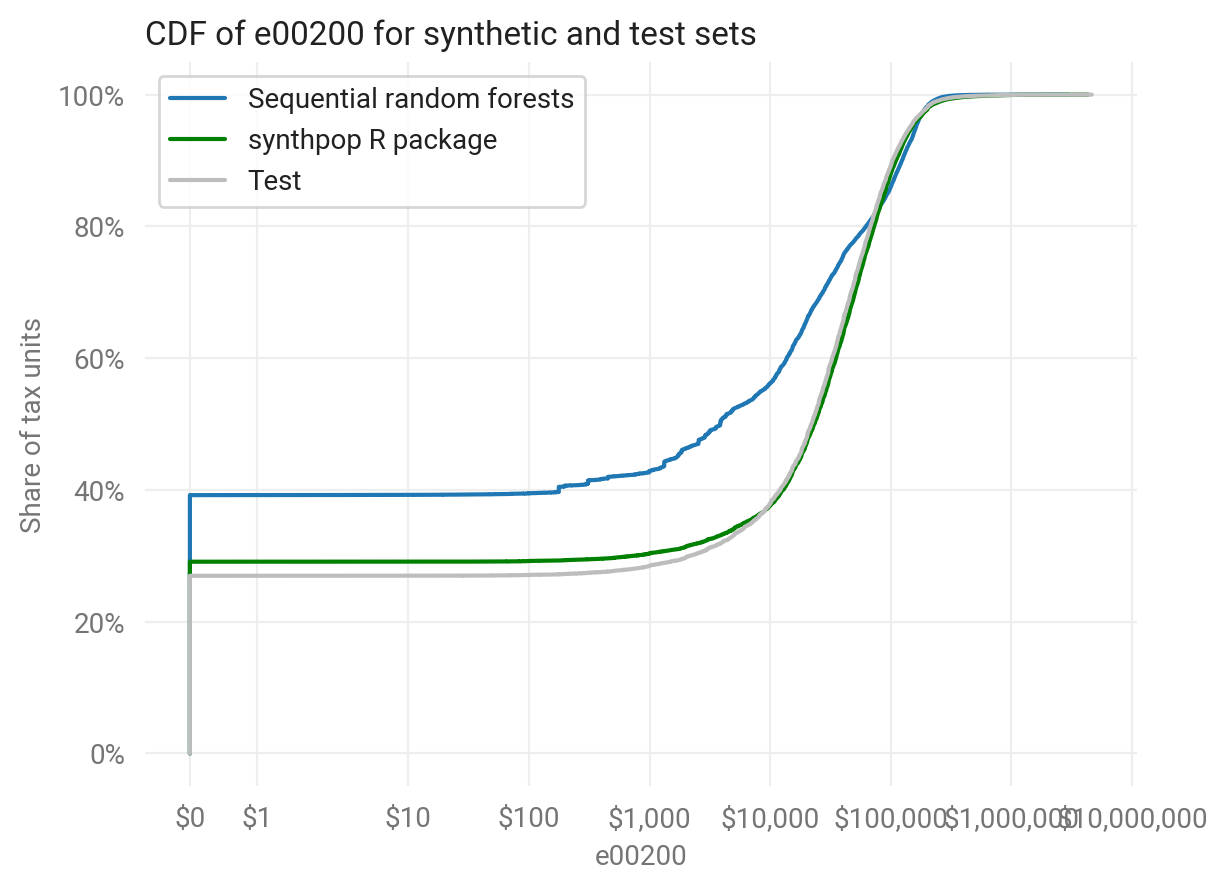

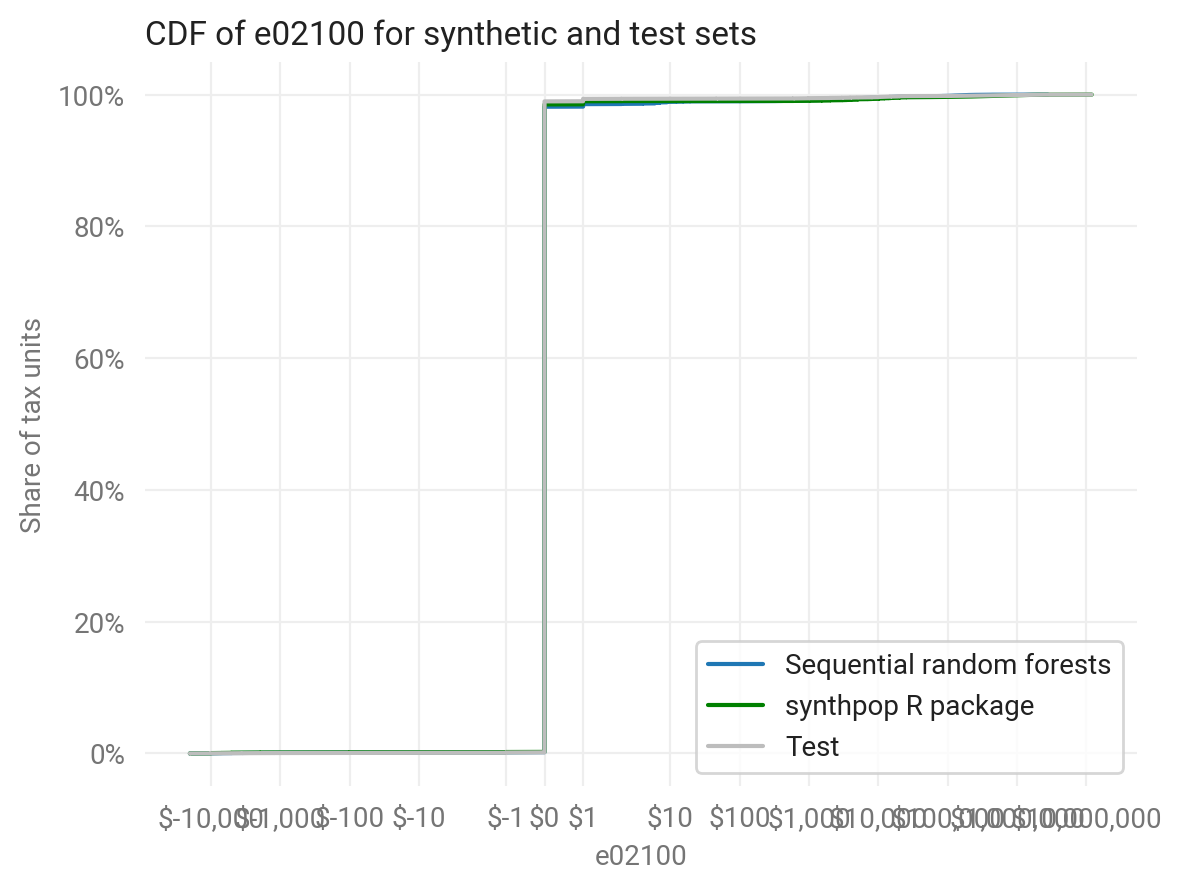

In [8]:
for i in test.columns[1:]:
    if i != 's006':
        compare_cdf(rf, synthpop, test, i)